# Analyse descriptive

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def displayMatrixCorr(df, val_manquante = None, bigSize = False):
    # Filtrer les colonnes ayant moins de 400 valeurs manquantes
    if val_manquante == None :
        corr_matrix = df.corr()
    else :
        filtered_df = df.loc[:, df.isnull().sum() < val_manquante]
    
        # Calculer la matrice de corrélation
        corr_matrix = filtered_df.corr()
    
    # Afficher la matrice de corrélation
    if bigSize :
        plt.figure(figsize=(24, 20))
    else :
        plt.figure(figsize=(14, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title("Matrice de corrélation")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def displayMissingValues(df) :
        # Calculer le nombre de valeurs manquantes par colonne
    missing_values = df.isnull().sum()

    # Créer l'histogramme
    plt.figure(figsize=(10,6))
    bars = plt.bar(missing_values.index, missing_values.values)

    # Ajouter les valeurs exactes au-dessus de chaque barre
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=5)

    # Rotation des labels de l'axe des x
    plt.xticks(rotation=45, ha='right', fontsize=7)

    # Ajouter un titre et labels des axes
    plt.title(f'Nombre de valeurs manquantes par colonne, nbreligne = {df.shape[0]}')
    plt.ylabel('Nombre de valeurs manquantes')

    # Afficher le graphique
    plt.tight_layout()  # Pour éviter que les labels soient coupés
    plt.show()

    return None

script_dir = Path.cwd()  # Obtenir le répertoire du script

df_raw = pd.read_csv(script_dir.parent / '4 - Dataset' / 'weld_data_raw.csv')
#print('Valeur unique de la colone "Type of weld" from df_raw : ', df_raw['Type of weld'].unique())

# Charger le fichier CSV
df = pd.read_csv(script_dir.parent / '4 - Dataset' / 'weld_data.csv')
df_with_minus1 = df.iloc[:,:44]
df = df.replace(-1, np.nan)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   float64
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    float64
 8   Vanadium concentration (weight%)              928 non-null    float64
 9   Copper concentration (weight%)                578 non-null    f

In [8]:
df = df.iloc[:,:44]

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   float64
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    float64
 8   Vanadium concentration (weight%)              928 non-null    float64
 9   Copper concentration (weight%)                578 non-null    f

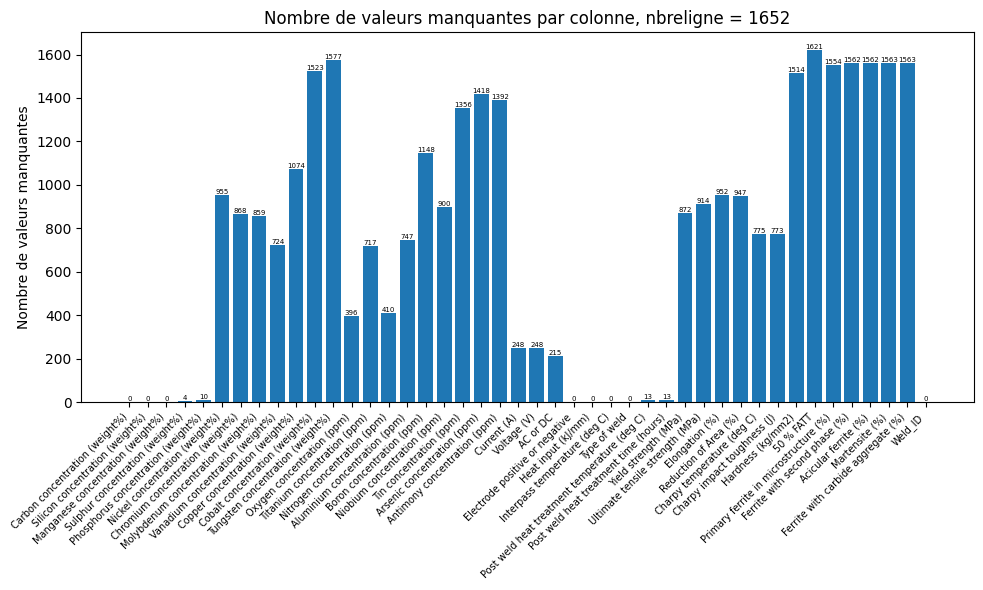

In [10]:
displayMissingValues(df)

In [11]:
def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()  # Obtenir les valeurs uniques de la colonne
        count_N = df[column].value_counts().get(np.nan, 0)
        print(f"Colonne '{column}' : {len(unique_values)} valeurs uniques et {count_N} valeurs manquantes")
        print(unique_values)
        print('-' * 50)

display_unique_values(df)

Colonne 'Carbon concentration (weight%)' : 81 valeurs uniques et 0 valeurs manquantes
[0.037  0.044  0.045  0.039  0.041  0.051  0.049  0.038  0.043  0.053
 0.046  0.048  0.074  0.075  0.076  0.068  0.081  0.079  0.078  0.069
 0.08   0.071  0.072  0.066  0.067  0.09   0.088  0.091  0.089  0.094
 0.086  0.04   0.047  0.052  0.05   0.054  0.073  0.077  0.07   0.062
 0.06   0.055  0.059  0.042  0.058  0.065  0.095  0.151  0.147  0.145
 0.061  0.035  0.1    0.12   0.099  0.093  0.101  0.096  0.097  0.03
 0.032  0.031  0.098  0.13   0.11   0.057  0.15   0.064  0.082  0.036
 0.125  0.105  0.115  0.1055 0.14   0.16   0.084  0.092  0.029  0.063
 0.18  ]
--------------------------------------------------
Colonne 'Silicon concentration (weight%)' : 68 valeurs uniques et 0 valeurs manquantes
[0.3   0.31  0.35  0.33  0.32  0.36  0.29  0.34  0.39  0.44  0.48  0.37
 0.51  0.57  0.27  0.45  0.24  0.41  0.46  0.43  0.42  0.52  0.54  0.18
 0.17  0.2   0.22  0.4   0.26  0.25  0.53  0.38  0.28  0.47  0.2

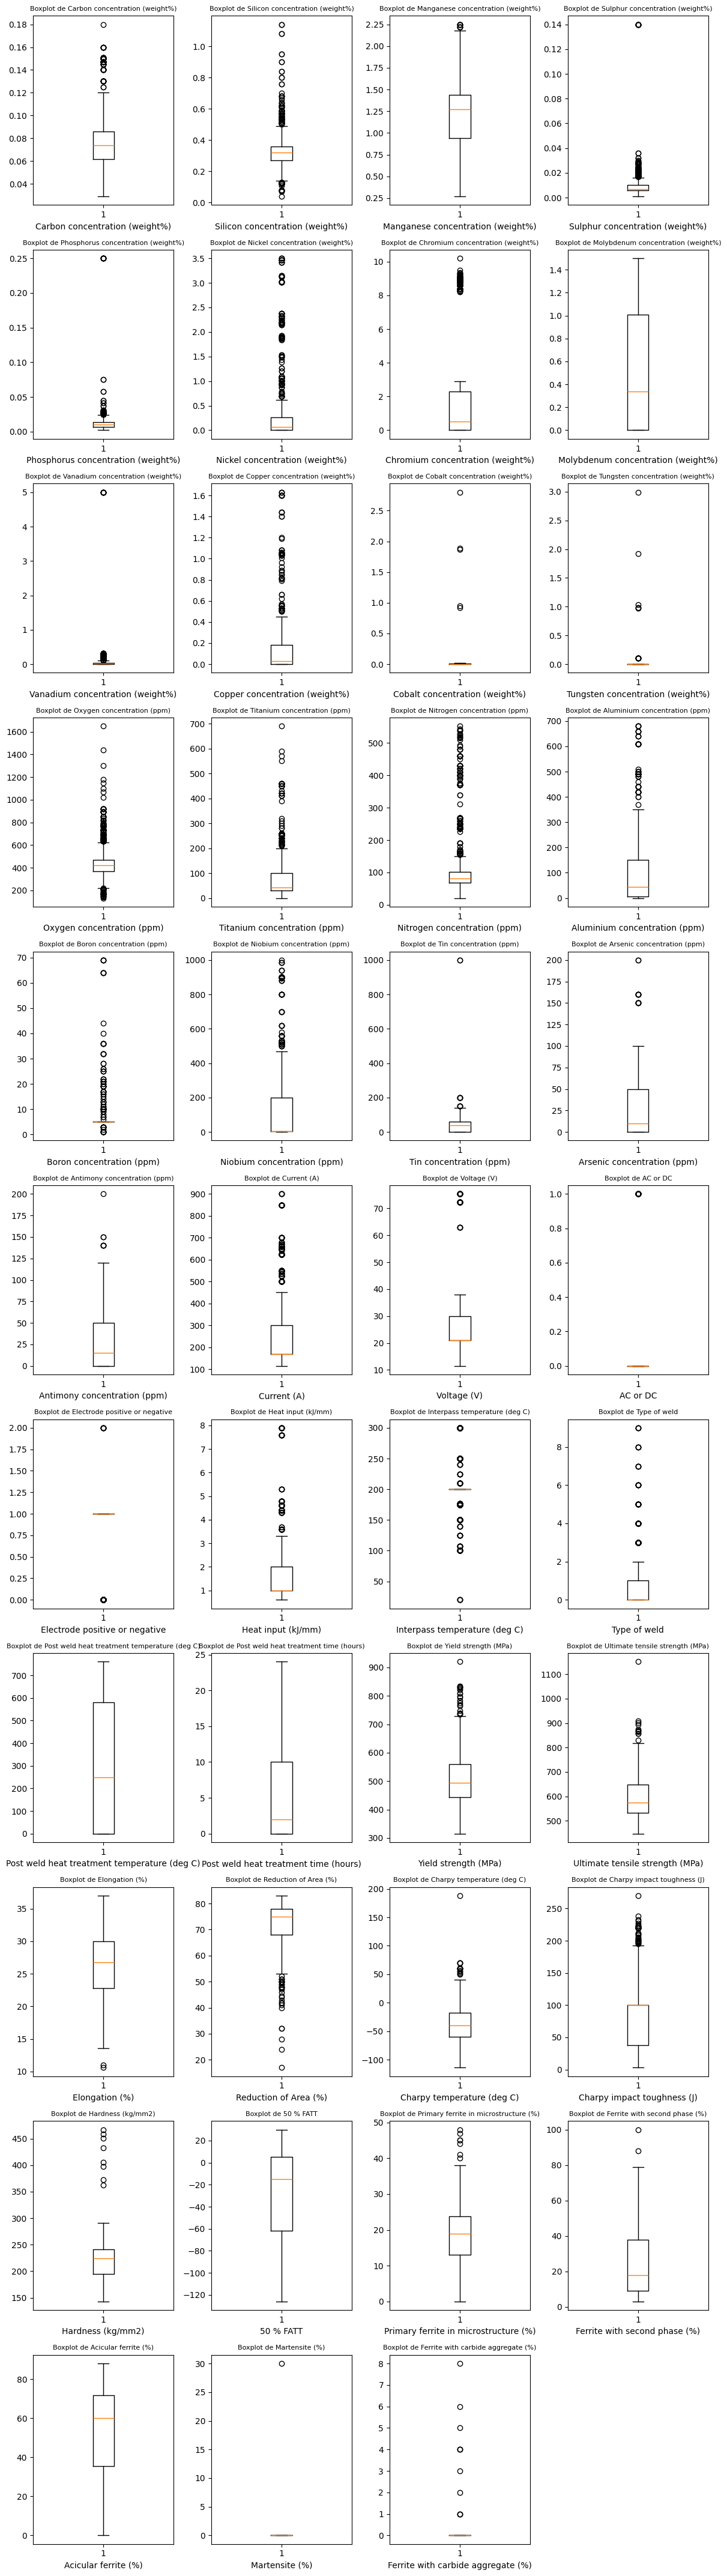

In [12]:
def display_boxplots_no_nan(df):
    # Compteur pour savoir combien de boxplots ont été affichés
    plot_count = 0
    # Création d'une figure avec 4 sous-graphes par ligne (1 ligne, 4 colonnes)
    fig, axes = plt.subplots(nrows=(len(df.columns)+1) // 4, ncols=4, figsize=(12, len(df.columns)))
    
    # Aplatir les axes (au cas où il y ait plusieurs lignes de sous-graphiques)
    axes = axes.flatten()
    
    # Parcourir chaque colonne du dataframe
    for col in df.columns:
        # Retirer les valeurs NaN de la colonne
        non_nan_values = df[col].dropna()
        
        # Vérifier s'il reste des valeurs après avoir retiré les NaN
        if not non_nan_values.empty:
            # Créer un boxplot pour la colonne dans l'axe correspondant
            axes[plot_count].boxplot(non_nan_values)
            
            # Titre du boxplot correspondant à la colonne
            axes[plot_count].set_title(f"Boxplot de {col}", fontsize = 8)
            axes[plot_count].set_xlabel(col)
            
            # Incrémenter le compteur de boxplots
            plot_count += 1
    
    # Supprimer les sous-graphiques inutilisés (s'il y en a)
    for i in range(plot_count, len(axes)):
        if i < len(axes):  # Vérifier que l'index est dans les limites
            fig.delaxes(axes[i])
    
    # Ajuster l'espacement entre les sous-graphiques
    plt.tight_layout()
    plt.show()
df_without_ID = df.iloc[:, :-1]
display_boxplots_no_nan(df_without_ID)

## Analyse avec excel outliers


In [ ]:
list_strange_behaviour_weldID = ['Chandel&', 'Evans', 'EvansLetter', 'EvHtIp1979', 'Icici&','JorgeEtAl', 'Mart' 'PantK' ,'Pat', 'SvenGret' ]

In [13]:
df_with_minus1.head()

Carbon concentration (weight%)  Silicon concentration (weight%)  \
0                           0.037                             0.30   
1                           0.037                             0.30   
2                           0.037                             0.30   
3                           0.037                             0.31   
4                           0.037                             0.31   

   Manganese concentration (weight%)  Sulphur concentration (weight%)  \
0                               0.65                            0.008   
1                               0.65                            0.008   
2                               0.65                            0.008   
3                               1.03                            0.007   
4                               1.03                            0.007   

   Phosphorus concentration (weight%)  Nickel concentration (weight%)  \
0                               0.012                             0.0   
1                               0.012                             0.0   
2                               0.012                             0.0   
3                               0.014                             0.0   
4                               0.014                             0.0   

   Chromium concentration (weight%)  Molybdenum concentration (weight%)  \
0                              -1.0                                -1.0   
1                              -1.0                                -1.0   
2                              -1.0                                -1.0   
3                              -1.0                                -1.0   
4                              -1.0                                -1.0   

   Vanadium concentration (weight%)  Copper concentration (weight%)  ...  \
0                              -1.0                            -1.0  ...   
1                              -1.0                            -1.0  ...   
2                              -1.0                            -1.0  ...   
3                              -1.0                            -1.0  ...   
4                              -1.0                            -1.0  ...   

   Charpy temperature (deg C)  Charpy impact toughness (J)  Hardness (kg/mm2)  \
0                        -1.0                         -1.0               -1.0   
1                       -28.0                        100.0               -1.0   
2                       -38.0                        100.0               -1.0   
3                        -1.0                         -1.0               -1.0   
4                       -48.0                        100.0               -1.0   

   50 % FATT  Primary ferrite in microstructure (%)  \
0       -1.0                                   -1.0   
1       -1.0                                   -1.0   
2       -1.0                                   -1.0   
3       -1.0                                   -1.0   
4       -1.0                                   32.0   

   Ferrite with second phase (%)  Acicular ferrite (%)  Martensite (%)  \
0                           -1.0                  -1.0            -1.0   
1                           -1.0                  -1.0            -1.0   
2                           -1.0                  -1.0            -1.0   
3                           -1.0                  -1.0            -1.0   
4                           28.0                  40.0             0.0   

   Ferrite with carbide aggregate (%)                        Weld_ID  
0                                -1.0    Evans-Ni/CMn-1990/1991-0Aaw  
1                                -1.0  Evans-Ni/CMn-1990/1991-0Aawch  
2                                -1.0    Evans-Ni/CMn-1990/1991-0Aht  
3                                -1.0    Evans-Ni/CMn-1990/1991-0Baw  
4                                 0.0  Evans-Ni/CMn-1990/1991-0Bawch  

[5 rows x 44 columns]

In [50]:
listeCompoChimique = [
    "Carbon concentration (weight%)", "Silicon concentration (weight%)",
    "Manganese concentration (weight%)", "Sulphur concentration (weight%)",
    "Phosphorus concentration (weight%)", "Nickel concentration (weight%)",
    "Chromium concentration (weight%)", "Molybdenum concentration (weight%)",
    "Vanadium concentration (weight%)", "Copper concentration (weight%)",
    "Cobalt concentration (weight%)", "Tungsten concentration (weight%)",
    "Oxygen concentration (ppm)", "Titanium concentration (ppm)",
    "Nitrogen concentration (ppm)", "Aluminium concentration (ppm)",
    "Boron concentration (ppm)", "Niobium concentration (ppm)",
    "Tin concentration (ppm)", "Arsenic concentration (ppm)",
    "Antimony concentration (ppm)", "Current (A)", "Voltage (V)",
    "AC or DC", "Electrode positive or negative", "Heat input (kJ/mm)",
    "Interpass temperature (deg C)", "Type of weld",
    "Post weld heat treatment temperature (deg C)", "Post weld heat treatment time (hours)",
]

L_update = [
    "Yield strength (MPa)", "Ultimate tensile strength (MPa)",
    "Elongation (%)", "Reduction of Area (%)"
]

L_check = [
    "Charpy temperature (deg C)", "Charpy impact toughness (J)"
]



import pandas as pd

def process_dataframe(df1, compare_cols, update_cols, check_cols):
    """
    Process the dataframe to identify duplicate rows based on the columns in compare_cols.
    Update the columns in update_cols based on specific rules, and check the columns in check_cols.
    
    Parameters:
    - df: DataFrame to process
    - compare_cols: List of column names to check for duplicates (equivalent to A, B, C)
    - update_cols: List of column names to update (equivalent to D, E)
    - check_cols: List of column names to check for NaN values (equivalent to F, G)
    
    Returns:
    - Updated DataFrame
    """
    df = df1.copy()
    # Liste pour suivre les lignes déjà traitées
    processed_indices = []
    counter = 0

    # Tant qu'il y a des lignes avec des colonnes compare_cols similaires qui n'ont pas été traitées
    while True:
        # Filtrer les lignes qui ne sont pas encore dans processed_indices
        remaining_rows = df[~df.index.isin(processed_indices)]
        
        # Si plus aucune ligne restante, sortir de la boucle
        if remaining_rows.empty:
            break
        
        # Grouper par les colonnes de comparaison
        grouped = remaining_rows.groupby(compare_cols)
        
        for _, group in grouped:
            # Si on a plus d'une ligne avec les mêmes valeurs pour compare_cols
            if len(group) > 1:
                temp_df = group.copy()
                #print(temp_df[check_cols].head())
                
                # Vérifier si une seule ligne a des NaN dans les colonnes check_cols
                nan_check_rows = temp_df[temp_df[check_cols].isna().all(axis=1)]
                
                if len(nan_check_rows) == 1:
                    # Si une seule ligne a NaN pour les colonnes check_cols
                    non_nan_check_rows = temp_df[~temp_df[check_cols].isna().all(axis=1)]
                    
                    # Vérifier que toutes les autres lignes (non NaN pour check_cols) ont NaN dans update_cols
                    if non_nan_check_rows[update_cols].isna().all(axis=None):
                        # Copier les valeurs de update_cols de la ligne avec NaN dans check_cols
                        # Ici, nous récupérons les valeurs de la première ligne avec NaN dans check_cols
                        df.loc[non_nan_check_rows.index, update_cols] = nan_check_rows[update_cols].values[0]
                        
                        # Afficher le dataframe modifié
                        #print("Dataframe modifié :")
                        #print(df.loc[non_nan_check_rows.index, update_cols + check_cols])
                        # Supprimer la ligne contenant NaN dans check_cols
                        df = df.drop(nan_check_rows.index)
                        counter += 1
                
                # Ajouter les index de ce groupe à la liste des indices traités
                processed_indices.extend(temp_df.index.tolist())
            else:
                # Si aucune modification n'est nécessaire, on ajoute l'index quand même
                processed_indices.extend(group.index.tolist())
    # Réinitialiser les index du DataFrame
    df = df.reset_index(drop=True)
    print(f"Nombre de lignes modifiés : {counter}")
    
    return df

Pour utiliser la fonction process_dataframe il faut que les données des colonnes "compare_cols" ne soit pas NaN mais il faut que les données manquantes dans update_cols et check_cols soit à NaN. Sinon le process ne marchera pas

In [46]:
df_with_minus1[["Yield strength (MPa)", "Ultimate tensile strength (MPa)",
    "Elongation (%)", "Reduction of Area (%)",
    "Charpy temperature (deg C)", "Charpy impact toughness (J)"]] = df_with_minus1[["Yield strength (MPa)", "Ultimate tensile strength (MPa)",
    "Elongation (%)", "Reduction of Area (%)",
    "Charpy temperature (deg C)", "Charpy impact toughness (J)"]].replace(-1, np.nan)

In [52]:
df_filled_missing_targets = process_dataframe(df_with_minus1,listeCompoChimique, L_update, L_check)

Nombre de lignes modifiés : 175


Traitement des lignes qui ont pour weld ID Ditt-%. C'est un cas particulier, il y a juste le WELD ID qui différencie les lignes. Les lignes de DITT on tous la même composition chimique et même recette. Ce qui change est uniquement les derniers caractères du weld ID

In [29]:
def update_weld_id_ditt(df, cols):
    # Créer une copie du dataframe d'origine
    df_copy = df.copy()
    
    # Liste pour stocker les indices déjà traités
    indices_passed = []
    
    # Boucle tant qu'il y a des lignes qui respectent la condition
    while True:
        # Filtrer les lignes qui commencent par "Ditt" et ne contiennent pas "ch"
        mask = df_copy['Weld_ID'].str.startswith("Ditt") & ~df_copy['Weld_ID'].str.contains("ch")
        
        # Exclure les lignes dont les index sont déjà passés
        mask &= ~df_copy.index.isin(indices_passed)
        
        # Si aucune ligne ne correspond, sortir de la boucle
        if not mask.any():
            break
        
        # Récupérer le premier index trouvé et marquer comme traité
        first_index = df_copy[mask].index[0]
        indices_passed.append(first_index)
        
        # Récupérer la chaîne de caractère Weld_ID trouvée
        weld_id_to_find = df_copy.loc[first_index, 'Weld_ID']
        
        # Copier les valeurs des colonnes 'A' et 'B' (ou autre liste donnée)
        values_to_copy = df_copy.loc[first_index, cols]
        
        # Trouver les lignes dont le Weld_ID commence par la chaîne trouvée (weld_id_to_find + %)
        matching_mask = df_copy['Weld_ID'].str.startswith(weld_id_to_find)
        
        # Appliquer les valeurs copiées aux lignes correspondantes
        df_copy.loc[matching_mask, cols] = values_to_copy.values

        # Afficher les valeurs après la modification
        print("Après modification:")
        print(df_copy.loc[matching_mask, cols])
        print("-" * 50)  # Séparateur pour chaque itération
    
    return df_copy

df_filled_missing_targets = update_weld_id_ditt(df_filled_missing_targets, L_update)


Après modification:
      Yield strength (MPa)  Ultimate tensile strength (MPa)  Elongation (%)  \
1294                 507.0                            613.0             NaN   
1295                 507.0                            613.0             NaN   
1296                 507.0                            613.0             NaN   
1297                 507.0                            613.0             NaN   

      Reduction of Area (%)  
1294                    NaN  
1295                    NaN  
1296                    NaN  
1297                    NaN  
--------------------------------------------------
Après modification:
      Yield strength (MPa)  Ultimate tensile strength (MPa)  Elongation (%)  \
1298                 527.0                            627.0             NaN   
1299                 527.0                            627.0             NaN   
1300                 527.0                            627.0             NaN   
1301                 527.0                     

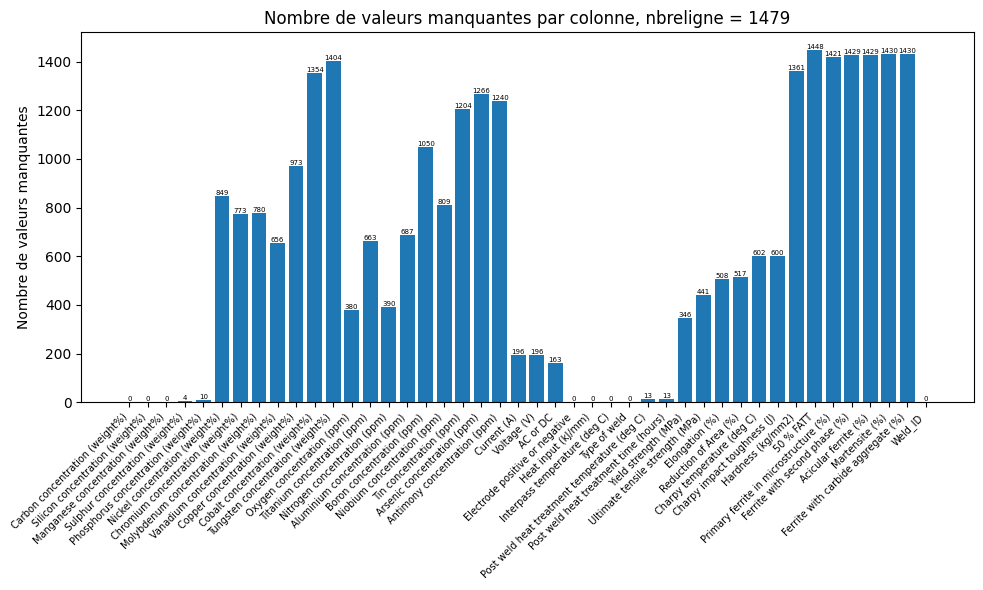

In [30]:
df_filled_missing_targets_NaN = df_filled_missing_targets.replace(-1, np.nan)
displayMissingValues(df_filled_missing_targets_NaN)

In [19]:
df_filled_missing_targets_NaN.to_csv('../4 - Dataset/prepoAvecWeldID.csv', index=False)

### Hypo sur weld Evans
L'hypo sur weld Evans est que les colonnes post weld heat treatment n'affecte pas le yield strenght et autre.

In [153]:
def update_weld_id_Evans(df, cols, match, ht = False):
    # Créer une copie du dataframe d'origine
    df_copy = df.copy()
    
    # Liste pour stocker les indices déjà traités
    indices_passed = []
    counter = 0
    # Boucle tant qu'il y a des lignes qui respectent la condition
    while True:
        # Filtrer les lignes qui commencent par "Ditt" et ne contiennent pas "ch"
        mask = df_copy['Weld_ID'].str.startswith(match) & ~df_copy['Weld_ID'].str.contains("ch")
        
        # Exclure les lignes dont les index sont déjà passés
        mask &= ~df_copy.index.isin(indices_passed)
        
        # Si aucune ligne ne correspond, sortir de la boucle
        if not mask.any():
            break
        
        # Récupérer le premier index trouvé et marquer comme traité
        first_index = df_copy[mask].index[0]
        indices_passed.append(first_index)
        
        # Récupérer la chaîne de caractère Weld_ID trouvée
        weld_id_to_find = df_copy.loc[first_index, 'Weld_ID']
        
        # Copier les valeurs des colonnes 'A' et 'B' (ou autre liste donnée)
        values_to_copy = df_copy.loc[first_index, cols]
        
        # Trouver les lignes dont le Weld_ID commence par la chaîne trouvée (weld_id_to_find + %)
        if ht :
            weld_id_to_find = weld_id_to_find[:-2] +"ch"
            matching_mask = df_copy['Weld_ID'].str.startswith(weld_id_to_find) # pour retirer le ht
        else :
            weld_id_to_find = weld_id_to_find +"ch"
            matching_mask = df_copy['Weld_ID'].str.startswith(weld_id_to_find)

        if df_copy.loc[matching_mask, cols].empty:
            print(f"Modification pour Weld_ID commençant par '{weld_id_to_find}':")
            print("Le DataFrame est vide.")
            print("-" * 50)  # Séparateur pour chaque itération
        else:
            print(f"Modification pour Weld_ID commençant par '{weld_id_to_find}':")
            print("Avant modification:")
            print(df_copy.loc[matching_mask, cols])

            # Appliquer les valeurs copiées aux lignes correspondantes
            df_copy.loc[matching_mask, cols] = values_to_copy.values
            counter += 1

            # Afficher les valeurs après la modification
            print("Après modification:")
            print(df_copy.loc[matching_mask, cols])
            print("-" * 50)  # Séparateur pour chaque itération

        
            
    print(f"Nombre de lignes modifiés : {counter}")
    return df_copy


In [162]:
df_filled_missing_targets_hypoEvans = df_filled_missing_targets.copy()
df_filled_missing_targets_hypoEvans = update_weld_id_ditt(df_filled_missing_targets_hypoEvans, L_update)

Après modification:
      Yield strength (MPa)  Ultimate tensile strength (MPa)  Elongation (%)  \
1292                 507.0                            613.0             NaN   
1293                 507.0                            613.0             NaN   
1294                 507.0                            613.0             NaN   
1295                 507.0                            613.0             NaN   

      Reduction of Area (%)  
1292                    NaN  
1293                    NaN  
1294                    NaN  
1295                    NaN  
--------------------------------------------------
Après modification:
      Yield strength (MPa)  Ultimate tensile strength (MPa)  Elongation (%)  \
1296                 527.0                            627.0             NaN   
1297                 527.0                            627.0             NaN   
1298                 527.0                            627.0             NaN   
1299                 527.0                     

In [163]:
df_filled_missing_targets_hypoEvans = update_weld_id_Evans(df_filled_missing_targets_hypoEvans, L_update, "Evans-Nb/Mn", False ) 
df_filled_missing_targets_hypoEvans = update_weld_id_Evans(df_filled_missing_targets_hypoEvans, L_update, "Evans-Ti/CMn", False )
df_filled_missing_targets_hypoEvans = update_weld_id_Evans(df_filled_missing_targets_hypoEvans, L_update, "Evans-Ti/Mn", False )
df_filled_missing_targets_hypoEvans = update_weld_id_Evans(df_filled_missing_targets_hypoEvans, L_update, "Evans-V/Mn", False )
df_filled_missing_targets_hypoEvans = update_weld_id_Evans(df_filled_missing_targets_hypoEvans, L_update, "Evans-AlTi", False )
df_filled_missing_targets_hypoEvans = update_weld_id_Evans(df_filled_missing_targets_hypoEvans, L_update, "Evans-Al/CMn", False )

Modification pour Weld_ID commençant par 'Evans-Nb/Mn-1991-A<5awch':
Avant modification:
     Yield strength (MPa)  Ultimate tensile strength (MPa)  Elongation (%)  \
347                   NaN                              NaN             NaN   

     Reduction of Area (%)  
347                    NaN  
Après modification:
     Yield strength (MPa)  Ultimate tensile strength (MPa)  Elongation (%)  \
347                 402.0                            494.0            33.3   

     Reduction of Area (%)  
347                   77.5  
--------------------------------------------------
Modification pour Weld_ID commençant par 'Evans-Nb/Mn-1991-A<5htch':
Le DataFrame est vide.
--------------------------------------------------
Modification pour Weld_ID commençant par 'Evans-Nb/Mn-1991-A120awch':
Avant modification:
     Yield strength (MPa)  Ultimate tensile strength (MPa)  Elongation (%)  \
350                   NaN                              NaN             NaN   

     Reduction of Ar

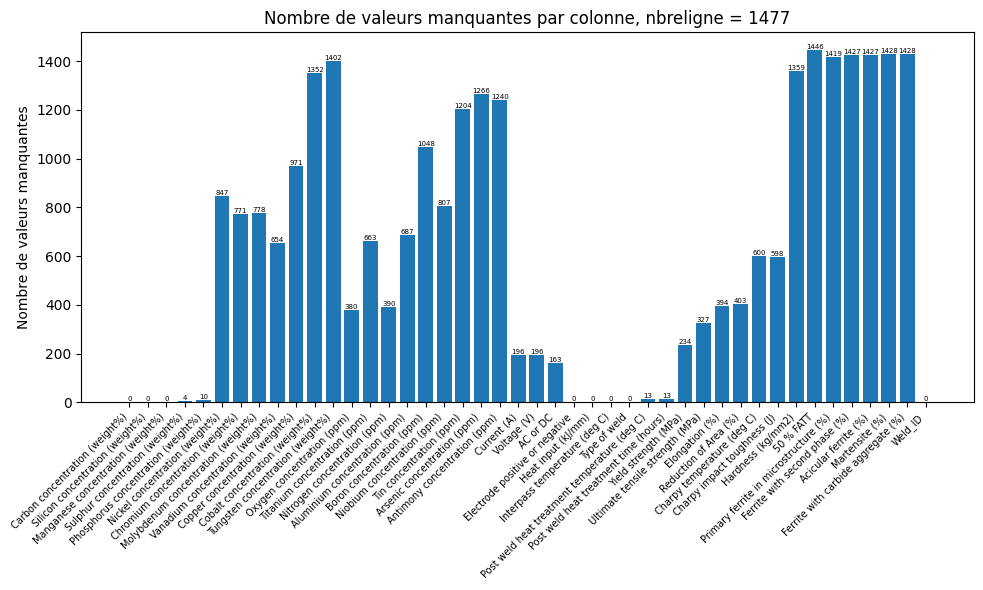

In [164]:
df_filled_missing_targets_hypoEvans_NaN = df_filled_missing_targets_hypoEvans.replace(-1, np.nan)
displayMissingValues(df_filled_missing_targets_hypoEvans_NaN)

In [165]:
df_filled_missing_targets_hypoEvans_NaN.to_csv('../4 - Dataset/prepoAvecWeldID_hypoEvans.csv', index=False)

### fin hypo sur weld Evans

## Gestion des colonnes avec plus de 80% de données manquantes

In [167]:
def plot_unique_value_histograms(df):
    # Parcourir chaque colonne du DataFrame
    for col in df.columns:
        # Compter le nombre d'occurrences des valeurs uniques dans la colonne
        unique_counts = df[col].value_counts()
        print(df[col].describe())

        # Créer un histogramme
        plt.figure(figsize=(10, 3))
        bars = plt.bar(unique_counts.index.astype(str), unique_counts.values, color='skyblue')

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=8)

        # Ajouter des étiquettes sur les axes et un titre
        plt.xlabel(f'Valeurs uniques de {col}')
        plt.ylabel('Nombre d\'occurrences')
        plt.title(f'Histogramme des valeurs uniques dans {col}')

        # Rotation des labels pour l'axe des x (au cas où il y a beaucoup de valeurs)
        plt.xticks(rotation=45, ha='right')

        # Afficher le graphique
        plt.tight_layout()
        plt.show()
        
def get_columns_with_p_percent_missingvalue(df,p = 80):
    total_rows = df.shape[0]
    RED = "\033[91m"  # Rouge
    RESET = "\033[0m"  # Réinitialiser la couleur
    column_more_p_percent_missingValues = []
    # Parcourir chaque colonne et calculer le pourcentage de valeurs manquantes
    for column in df.columns:
        missing_count = df[column].isnull().sum()  # Compte des valeurs manquantes
        missing_percentage = (missing_count / total_rows) * 100  # Pourcentage
        
        # Affichage avec couleur rouge si le pourcentage est supérieur à 80%
        if missing_percentage > p:
            print(f"Colonne: {column}, Pourcentage de valeurs manquantes: {RED}{missing_percentage:.2f}%{RESET}")
            column_more_p_percent_missingValues.append(column)
        else:
            print(f"Colonne: {column}, Pourcentage de valeurs manquantes: {missing_percentage:.2f}%")
    return column_more_p_percent_missingValues

colums_more80percent_missingvalue = get_columns_with_p_percent_missingvalue(df_filled_missing_targets_NaN)

Colonne: Carbon concentration (weight%), Pourcentage de valeurs manquantes: 0.00%
Colonne: Silicon concentration (weight%), Pourcentage de valeurs manquantes: 0.00%
Colonne: Manganese concentration (weight%), Pourcentage de valeurs manquantes: 0.00%
Colonne: Sulphur concentration (weight%), Pourcentage de valeurs manquantes: 0.27%
Colonne: Phosphorus concentration (weight%), Pourcentage de valeurs manquantes: 0.68%
Colonne: Nickel concentration (weight%), Pourcentage de valeurs manquantes: 57.40%
Colonne: Chromium concentration (weight%), Pourcentage de valeurs manquantes: 52.27%
Colonne: Molybdenum concentration (weight%), Pourcentage de valeurs manquantes: 52.74%
Colonne: Vanadium concentration (weight%), Pourcentage de valeurs manquantes: 44.35%
Colonne: Copper concentration (weight%), Pourcentage de valeurs manquantes: 65.79%
Colonne: Cobalt concentration (weight%), Pourcentage de valeurs manquantes: 91.55%
Colonne: Tungsten concentration (weight%), Pourcentage de valeurs manquante

Il y a un pattern qui est que les colonnes allant de Primary Ferrite à Ferrite with carbide aggregate ont des valeurs non null uniquement pour un post weld heat treatment à 0. En fait lorsqu'il n'y a pas eu de post weld treatment.

On va afficher une matrice de corrélation

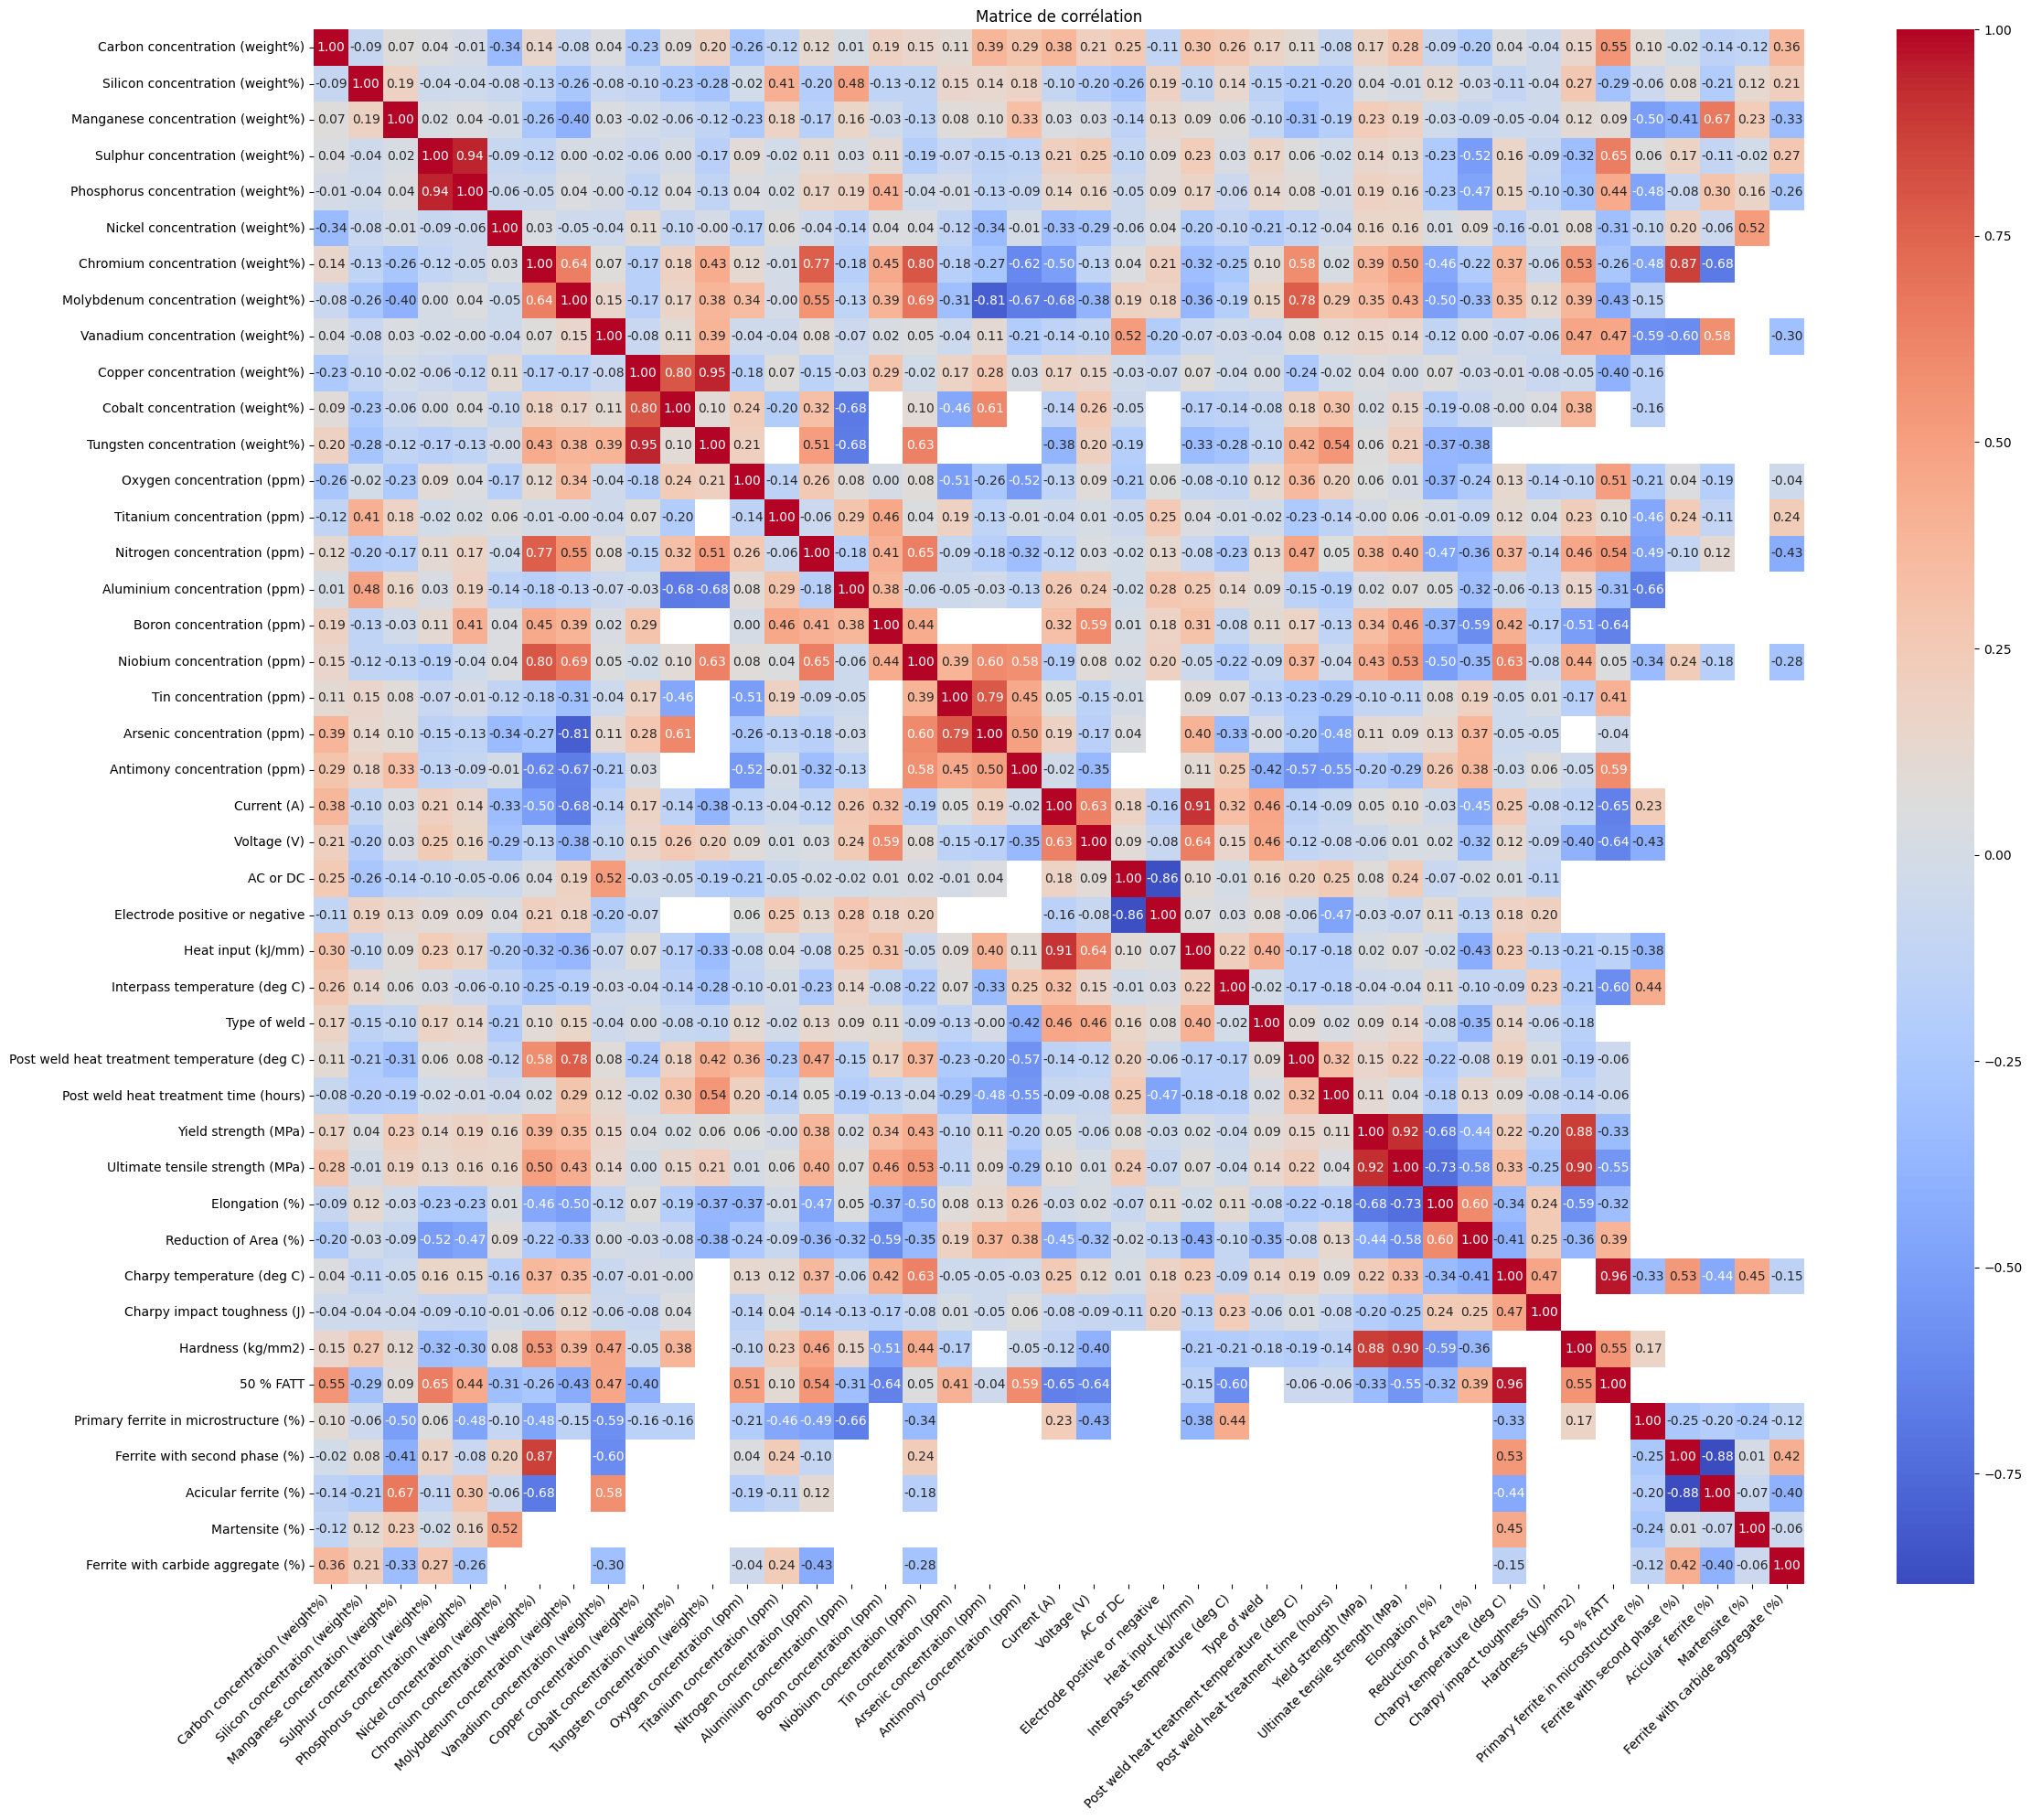

In [22]:
displayMatrixCorr(df_filled_missing_targets_NaN.iloc[:,:-1],bigSize=True)

count    125.000000
mean       0.073056
std        0.359208
min        0.000000
25%        0.000000
50%        0.005000
75%        0.010000
max        2.800000
Name: Cobalt concentration (weight%), dtype: float64


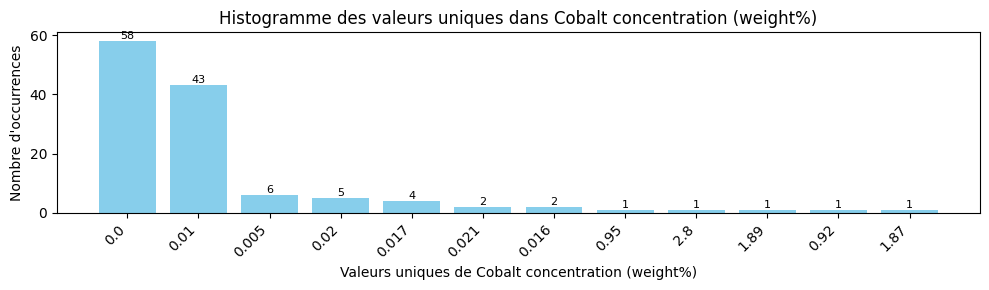

count    75.000000
mean      0.134267
std       0.454958
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.990000
Name: Tungsten concentration (weight%), dtype: float64


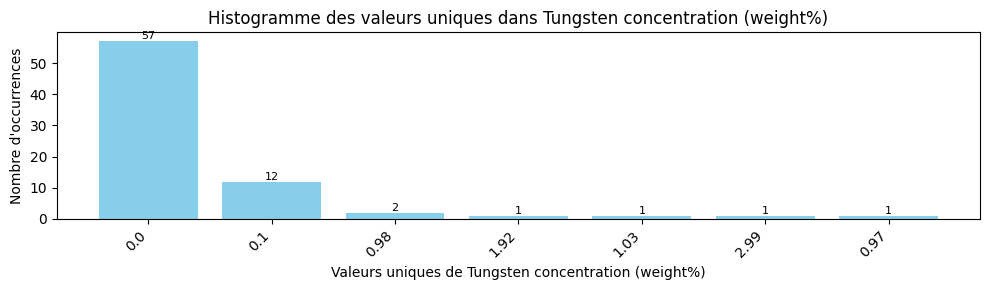

count     273.000000
mean       42.646722
std        92.456771
min         0.000000
25%         0.008000
50%        30.000000
75%        60.000000
max      1000.000000
Name: Tin concentration (ppm), dtype: float64


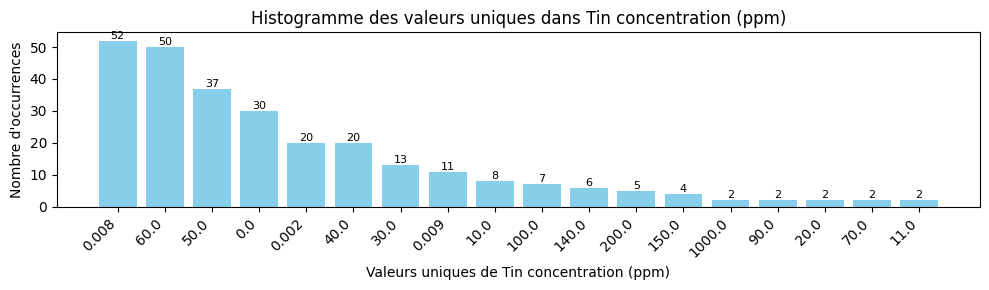

count    211.000000
mean      32.293962
std       44.574656
min        0.003000
25%        0.030000
50%       10.000000
75%       50.000000
max      200.000000
Name: Arsenic concentration (ppm), dtype: float64


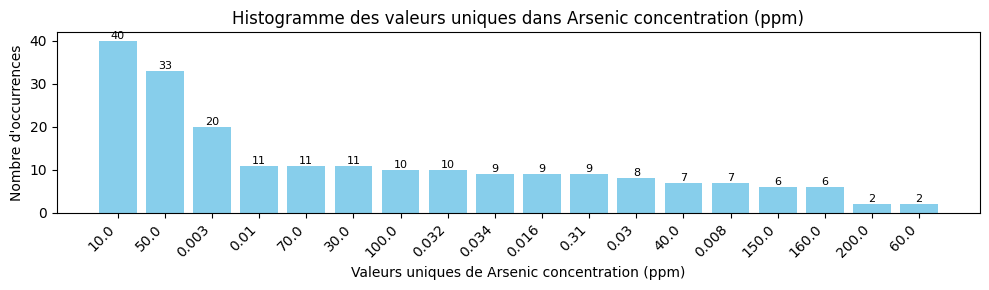

count    237.000000
mean      29.487443
std       37.824209
min        0.000000
25%        0.008000
50%       10.000000
75%       50.000000
max      200.000000
Name: Antimony concentration (ppm), dtype: float64


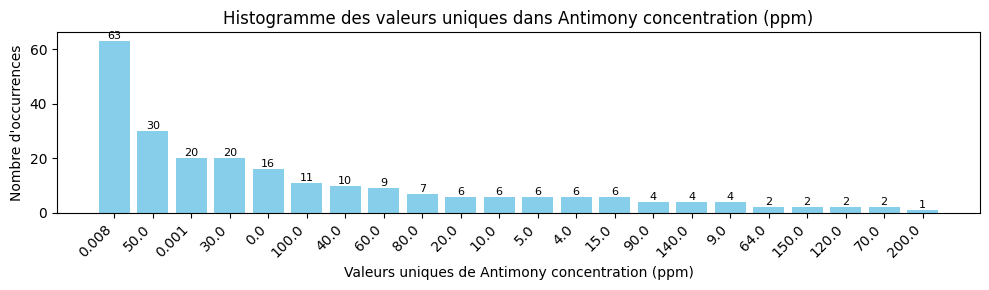

count    118.000000
mean     234.940678
std       56.576745
min      154.000000
25%      208.250000
50%      226.000000
75%      243.250000
max      467.000000
Name: Hardness (kg/mm2), dtype: float64


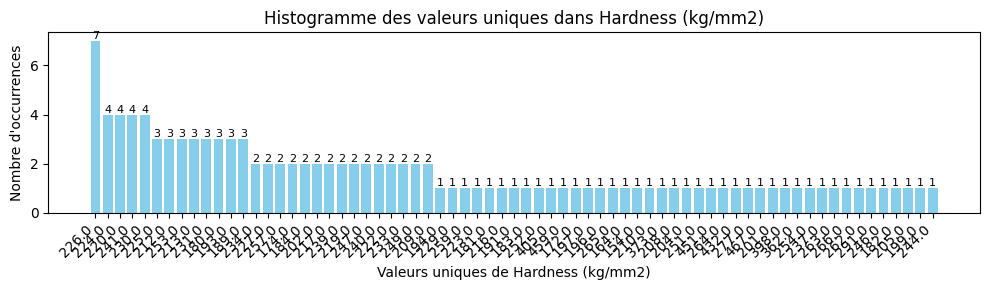

count     31.000000
mean     -31.096774
std       43.644285
min     -126.000000
25%      -62.000000
50%      -15.000000
75%        5.000000
max       30.000000
Name: 50 % FATT, dtype: float64


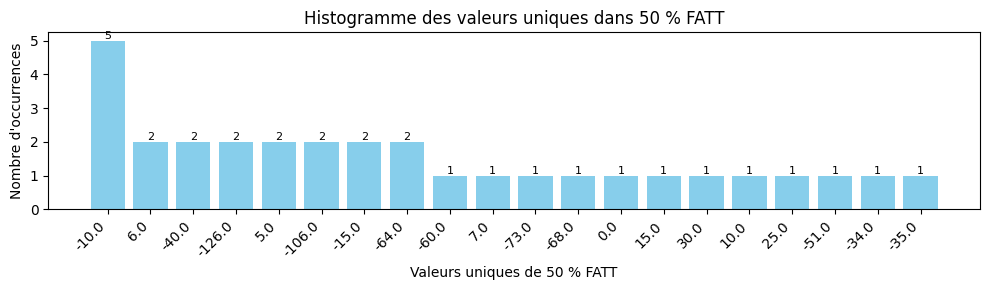

count    58.000000
mean     17.034483
std      12.126476
min       0.000000
25%       8.250000
50%      16.000000
75%      23.750000
max      48.000000
Name: Primary ferrite in microstructure (%), dtype: float64


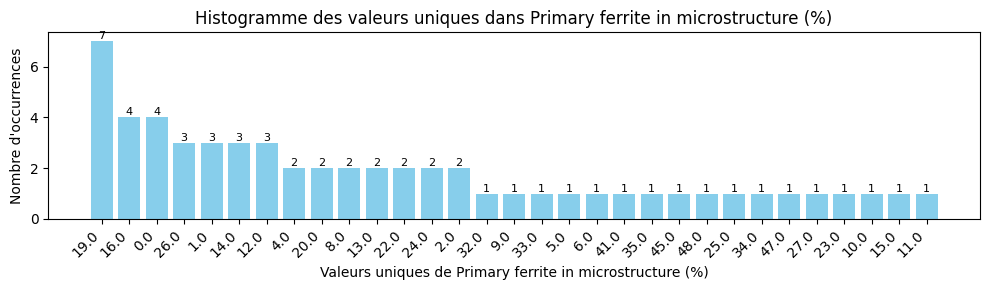

count     50.000000
mean      31.580000
std       22.969447
min        3.000000
25%       14.000000
50%       27.000000
75%       45.500000
max      100.000000
Name: Ferrite with second phase (%), dtype: float64


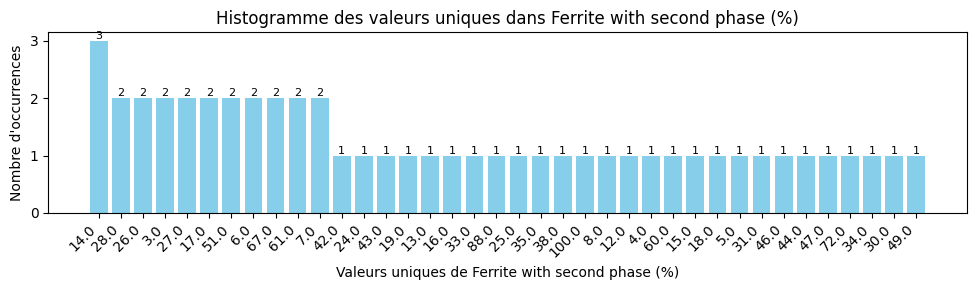

count    50.00000
mean     47.86000
std      23.32994
min       0.00000
25%      34.25000
50%      49.50000
75%      63.00000
max      88.00000
Name: Acicular ferrite (%), dtype: float64


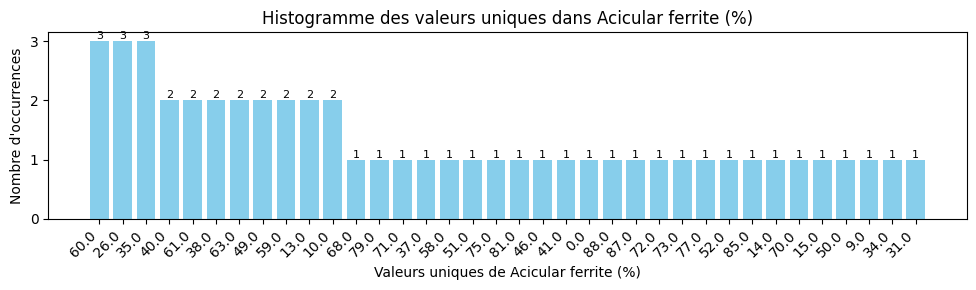

count    49.000000
mean      0.612245
std       4.285714
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      30.000000
Name: Martensite (%), dtype: float64


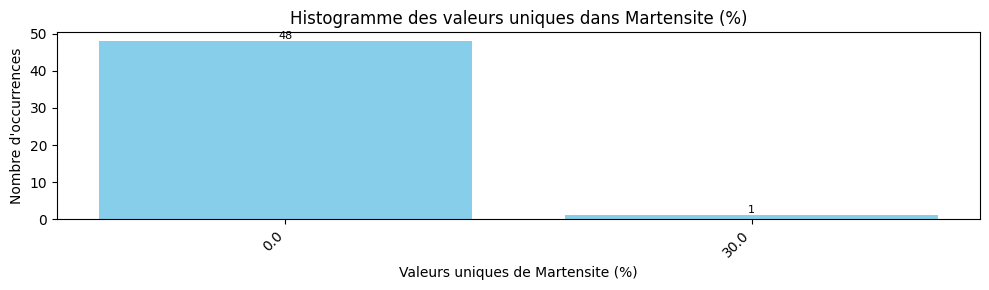

count    49.000000
mean      0.632653
std       1.481748
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       6.000000
Name: Ferrite with carbide aggregate (%), dtype: float64


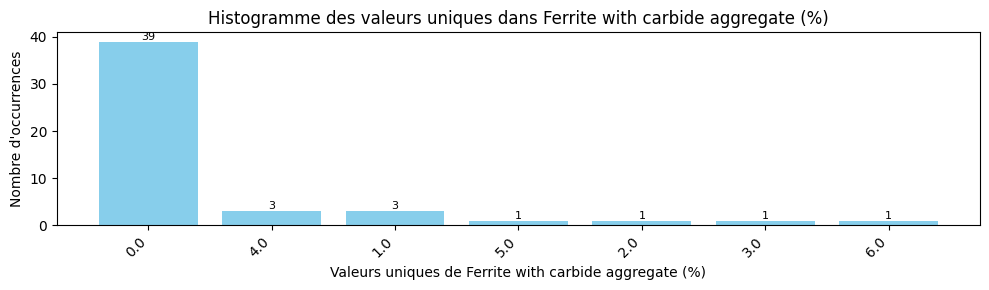

In [23]:
plot_unique_value_histograms(df_filled_missing_targets_NaN[colums_more80percent_missingvalue])

On va donc supprimer ces colonnes qui contiennent beaucoup de données manquantes et en plus pour certaines elles ne seront pas pertinentes car elles ont essentiellement qu'une valeur en très grande proportion dans les données non null.

In [168]:
columnToDelete = [x for x in colums_more80percent_missingvalue if x != "Hardness (kg/mm2)"]

def supprimer_colonnes(df, colonnes_a_supprimer):
    df_copy = df.copy()
    # Parcourir chaque colonne dans la liste des colonnes à supprimer
    for col in colonnes_a_supprimer:
        # Vérifier si la colonne existe dans le DataFrame
        if col in df_copy.columns:
            # Supprimer la colonne
            df_copy.drop(columns=[col], inplace=True)
            # Afficher un message de succès
            print(f"La colonne '{col}' a été supprimée avec succès.")
        else:
            # Afficher un message si la colonne n'existe pas
            print(f"La colonne '{col}' n'existe pas dans le DataFrame.")
    
    return df_copy

df_filled_missing_targets_NaN_with_less_cols = supprimer_colonnes(df_filled_missing_targets_NaN,columnToDelete)

La colonne 'Cobalt concentration (weight%)' a été supprimée avec succès.
La colonne 'Tungsten concentration (weight%)' a été supprimée avec succès.
La colonne 'Tin concentration (ppm)' a été supprimée avec succès.
La colonne 'Arsenic concentration (ppm)' a été supprimée avec succès.
La colonne 'Antimony concentration (ppm)' a été supprimée avec succès.
La colonne '50 % FATT' a été supprimée avec succès.
La colonne 'Primary ferrite in microstructure (%)' a été supprimée avec succès.
La colonne 'Ferrite with second phase (%)' a été supprimée avec succès.
La colonne 'Acicular ferrite (%)' a été supprimée avec succès.
La colonne 'Martensite (%)' a été supprimée avec succès.
La colonne 'Ferrite with carbide aggregate (%)' a été supprimée avec succès.


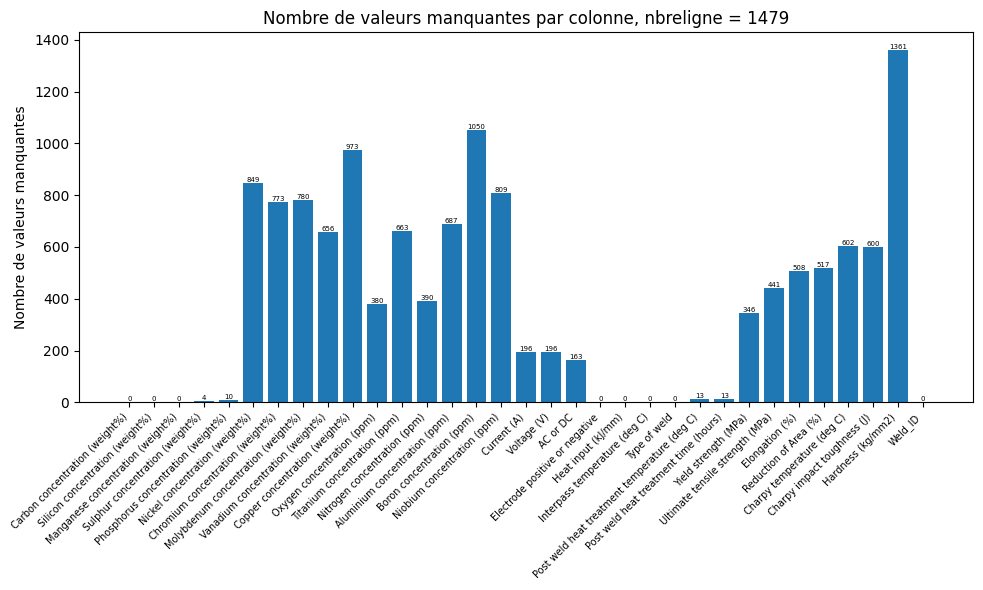

In [169]:
displayMissingValues(df_filled_missing_targets_NaN_with_less_cols)

## Gestion des unités

In [170]:
def modify_columns_ppm(df):
    # Parcourir toutes les colonnes du dataframe
    df_same_unit = df.copy()
    for col in df_same_unit.columns:
        # Vérifier si "ppm" est présent dans le nom de la colonne et si la colonne n'est pas de type 'object'
        if "ppm" in col and df_same_unit[col].dtype != object:
            # Diviser les valeurs par 10 000
            df_same_unit[col] = df_same_unit[col] / 10000
            
            # Modifier le nom de la colonne, remplacer "ppm" par "%"
            new_col_name = col.replace("ppm", "%")
            df_same_unit.rename(columns={col: new_col_name}, inplace=True)
            
    return df_same_unit

df_filled_missing_targets_NaN_with_less_cols_same_Unit = modify_columns_ppm(df_filled_missing_targets_NaN_with_less_cols)
print(df_filled_missing_targets_NaN_with_less_cols_same_Unit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1479 non-null   float64
 1   Silicon concentration (weight%)               1479 non-null   float64
 2   Manganese concentration (weight%)             1479 non-null   float64
 3   Sulphur concentration (weight%)               1475 non-null   float64
 4   Phosphorus concentration (weight%)            1469 non-null   float64
 5   Nickel concentration (weight%)                630 non-null    float64
 6   Chromium concentration (weight%)              706 non-null    float64
 7   Molybdenum concentration (weight%)            699 non-null    float64
 8   Vanadium concentration (weight%)              823 non-null    float64
 9   Copper concentration (weight%)                506 non-null    f

## Gestion des outliers

In [171]:
def remove_outliers_iqr(df):
    # Créer une copie du DataFrame pour ne pas modifier l'original
    df_cleaned = df.copy()

    # Parcourir chaque colonne numérique du DataFrame
    for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        # Calculer les quartiles Q1 (25e percentile) et Q3 (75e percentile)
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        
        # Calculer l'IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Définir les bornes pour identifier les outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Supprimer les lignes qui contiennent des outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        print(f"Colonne {col} : {df.shape[0]-df_cleaned.shape[0]} lignes supprimées")

    return df_cleaned

def get_outlier_indices(df, coeff = 1.5):
    # Initialiser un dictionnaire pour stocker les indices des lignes à supprimer
    outlier_indices = {}
    no_outlier_feature = []

    # Parcourir chaque colonne numérique du DataFrame
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculer les quartiles Q1 (25e percentile) et Q3 (75e percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculer l'IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Définir les bornes pour identifier les outliers
        lower_bound = Q1 - coeff * IQR
        upper_bound = Q3 + coeff * IQR
        
        # Trouver les indices des lignes où la valeur est un outlier
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        
        # Si des outliers sont trouvés, les ajouter au dictionnaire
        if outliers:
            outlier_indices[col] = outliers
        else :
            no_outlier_feature.append(col)

    return outlier_indices , no_outlier_feature

def get_outlier_indices_zscore(df, threshold=3):
    """
    Fonction qui retourne les indices des outliers selon le z-score et les colonnes sans outliers.
    
    Paramètres :
    - df : le DataFrame à analyser
    - threshold : seuil du z-score au-delà duquel une valeur est considérée comme un outlier (par défaut 3)
    
    Retourne :
    - outlier_indices : un dictionnaire avec les colonnes contenant des outliers et leurs indices
    - no_outlier_feature : une liste des colonnes sans outliers
    """
    # Initialiser un dictionnaire pour stocker les indices des lignes à supprimer
    outlier_indices = {}
    no_outlier_feature = []

    # Parcourir chaque colonne numérique du DataFrame
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculer la moyenne et l'écart-type de la colonne
        mean_col = df[col].mean()
        std_col = df[col].std()

        # Calculer le z-score pour chaque valeur de la colonne
        z_scores = (df[col] - mean_col) / std_col
        
        # Trouver les indices des lignes où la valeur a un z-score au-dessus du seuil
        outliers = df[(np.abs(z_scores) > threshold)].index.tolist()
        
        # Si des outliers sont trouvés, les ajouter au dictionnaire
        if outliers:
            outlier_indices[col] = outliers
        else:
            no_outlier_feature.append(col)

    return outlier_indices, no_outlier_feature

# Dans le dataframe suivant je ne prends pas les colonnes :Boron et interpass temperature 
# car elles sont telement dispersé les valeurs que ça supprime trop de ligne

df_check_outlier = df_filled_missing_targets_NaN_with_less_cols_same_Unit.drop(columns=[
    'AC or DC', 'Electrode positive or negative','Type of weld','Weld_ID', 'Boron concentration (%)','Interpass temperature (deg C)', 'Nitrogen concentration (%)', 'Nickel concentration (weight%)' ])

dico_indice_outliers_IQR, no_outlier_feature = get_outlier_indices(df_check_outlier,5)
#print(len(dico_indice_outliers))
print(no_outlier_feature)

#dico_zscore , no_outlier_feature_zscore= get_outlier_indices_zscore(df_test_chemi)
#print(df_test_chemi.shape[1])
#print(len(dico_zscore))
#print(no_outlier_feature_zscore)

#print(df_test_chemi.info())

valeurs_uniques = set()
for cle, valeur in dico_indice_outliers_IQR.items():
    valeurs_uniques.update(valeur)
    # Vérifier que la valeur est une liste
    if isinstance(valeur, list):
        # Afficher la clé et la longueur de la liste
        print(f"Clé : {cle}, Longueur de la liste : {len(valeur)}")

print("Valeurs uniques :", valeurs_uniques)
print("longeur :" , len(valeurs_uniques))

['Carbon concentration (weight%)', 'Manganese concentration (weight%)', 'Chromium concentration (weight%)', 'Molybdenum concentration (weight%)', 'Aluminium concentration (%)', 'Niobium concentration (%)', 'Current (A)', 'Post weld heat treatment temperature (deg C)', 'Post weld heat treatment time (hours)', 'Yield strength (MPa)', 'Ultimate tensile strength (MPa)', 'Elongation (%)', 'Reduction of Area (%)', 'Charpy temperature (deg C)', 'Charpy impact toughness (J)']
Clé : Silicon concentration (weight%), Longueur de la liste : 10
Clé : Sulphur concentration (weight%), Longueur de la liste : 13
Clé : Phosphorus concentration (weight%), Longueur de la liste : 13
Clé : Vanadium concentration (weight%), Longueur de la liste : 14
Clé : Copper concentration (weight%), Longueur de la liste : 24
Clé : Oxygen concentration (%), Longueur de la liste : 8
Clé : Titanium concentration (%), Longueur de la liste : 20
Clé : Voltage (V), Longueur de la liste : 32
Clé : Heat input (kJ/mm), Longueur de

In [172]:
df_noOutliers = df_filled_missing_targets_NaN_with_less_cols_same_Unit.drop(valeurs_uniques)
print(df_noOutliers.index)
df_noOutliers = df_noOutliers.reset_index(drop=True) #Réinitialiser l'indexation
print(df_noOutliers.index)
print(df_noOutliers.shape)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1465, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478],
      dtype='int64', length=1324)
RangeIndex(start=0, stop=1324, step=1)
(1324, 33)


# Création df pour régression

In [174]:
df_reg = df_filled_missing_targets_NaN_with_less_cols_same_Unit.copy()
df_reg_noOutliers = df_noOutliers.copy()

In [175]:
print(df_reg.columns)

Index(['Carbon concentration (weight%)', 'Silicon concentration (weight%)',
       'Manganese concentration (weight%)', 'Sulphur concentration (weight%)',
       'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)',
       'Chromium concentration (weight%)',
       'Molybdenum concentration (weight%)',
       'Vanadium concentration (weight%)', 'Copper concentration (weight%)',
       'Oxygen concentration (%)', 'Titanium concentration (%)',
       'Nitrogen concentration (%)', 'Aluminium concentration (%)',
       'Boron concentration (%)', 'Niobium concentration (%)', 'Current (A)',
       'Voltage (V)', 'AC or DC', 'Electrode positive or negative',
       'Heat input (kJ/mm)', 'Interpass temperature (deg C)', 'Type of weld',
       'Post weld heat treatment temperature (deg C)',
       'Post weld heat treatment time (hours)', 'Yield strength (MPa)',
       'Ultimate tensile strength (MPa)', 'Elongation (%)',
       'Reduction of Area (%)', 'Charpy temperature (deg 

In [176]:
L_features = [
    'Carbon concentration (weight%)', 'Silicon concentration (weight%)',
       'Manganese concentration (weight%)', 'Sulphur concentration (weight%)',
       'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)',
       'Chromium concentration (weight%)',
       'Molybdenum concentration (weight%)',
       'Vanadium concentration (weight%)', 'Copper concentration (weight%)',
       'Oxygen concentration (%)', 'Titanium concentration (%)',
       'Nitrogen concentration (%)', 'Aluminium concentration (%)',
       'Boron concentration (%)', 'Niobium concentration (%)', 'Current (A)',
       'Voltage (V)', 'AC or DC', 'Electrode positive or negative',
       'Heat input (kJ/mm)', 'Interpass temperature (deg C)', 'Type of weld',
       'Post weld heat treatment temperature (deg C)',
       'Post weld heat treatment time (hours)'
]

# Charpy temp est mis dans targets même si c'est un feature, mais un feature particulier il ne peux pas être déterminé à partir des autres colonnes
# c'est une colonne MAR ?
L_targets = [
    'Yield strength (MPa)', 
       'Ultimate tensile strength (MPa)', 'Elongation (%)',
       'Reduction of Area (%)', 'Charpy temperature (deg C)', 'Charpy impact toughness (J)', 'Hardness (kg/mm2)'
]

X = df_reg.loc[:,L_features]
X_noOutliers = df_reg_noOutliers.loc[:,L_features]
y = df_reg.loc[:,L_targets]
y_noOutliers = df_reg_noOutliers.loc[:,L_targets]


X_reg_categoric = X[['AC or DC', 'Electrode positive or negative', 'Type of weld']]
X_reg_categoric_noOutliers = X_noOutliers[['AC or DC', 'Electrode positive or negative', 'Type of weld']]
print(X_reg_categoric.info())
#Récupère les features numériques
X_reg_numeric = X.drop(columns=['AC or DC', 'Electrode positive or negative', 'Type of weld'])
X_reg_numeric_noOutliers = X_noOutliers.drop(columns=['AC or DC', 'Electrode positive or negative', 'Type of weld'])
print(X_reg_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AC or DC                        1316 non-null   float64
 1   Electrode positive or negative  1479 non-null   int64  
 2   Type of weld                    1479 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 34.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1479 non-null   float64
 1   Silicon concentration (weight%)               1479 non-null   float64
 2   Manganese concentration (weight%)             1479 non-null   float64
 3   Sulphur concentration (weight%)               

In [177]:
X = df_reg.loc[:,L_features]
print(X.shape)
X = X.drop_duplicates()
print(X.shape)

(1479, 25)
(995, 25)


In [40]:
def classify_columns_by_missing_data(df, threshold=0.4):
    L1 = []  # Liste pour les colonnes avec moins de 40% de valeurs manquantes
    L2 = []  # Liste pour les colonnes avec plus de 40% de valeurs manquantes
    
    # Nombre total de lignes dans le DataFrame
    total_rows = df.shape[0]
    
    # Parcourir chaque colonne du DataFrame
    for col in df.columns:
        # Calculer le pourcentage de valeurs manquantes
        missing_percentage = df[col].isnull().sum() / total_rows
        
        # Ajouter à L1 si le pourcentage de valeurs manquantes est inférieur au seuil
        if missing_percentage < threshold:
            L1.append(col)
        # Ajouter à L2 si le pourcentage de valeurs manquantes est supérieur ou égal au seuil
        else:
            L2.append(col)
    
    return L1, L2

X_columns_univariate, X_colums_multivariate = classify_columns_by_missing_data(X_reg_numeric)
print("Uni : ", X_columns_univariate)
print("Multi : " , X_colums_multivariate)

X_columns_univariate_noOutliers, X_colums_multivariate_noOutliers = classify_columns_by_missing_data(X_reg_numeric_noOutliers)
print("Uni no outliers: ", X_columns_univariate_noOutliers)
print("Multi no outliers: " , X_colums_multivariate_noOutliers)

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
# --------------------------------------------------------------------------------------------
X_univariate = X_reg_numeric[X_columns_univariate] #Dataframe avec les colonnes univariate
# Instantiate a transformer for mean imputation.
imp_mean = SimpleImputer(strategy='median')

# Transforms X so that the missing values are determined by mean imputation.
# The "fit" part is used to compute the mean of the values in X[:, 1]
X_mean = imp_mean.fit_transform(X_univariate)

df_final_univariate = pd.DataFrame(X_mean , columns=X_univariate.columns)
#displayMatrixCorr(df_final_univariate)

imp_mostFrequent = SimpleImputer(strategy="most_frequent")
X_mostFrequent = imp_mostFrequent.fit_transform(X_reg_categoric)
df_final_categoric = pd.DataFrame(X_mostFrequent , columns=X_reg_categoric.columns)


df_multivariate = X_reg_numeric[X_colums_multivariate]

it_imp = IterativeImputer(sample_posterior=True)
X_it_imp = it_imp.fit_transform(df_multivariate)
df_final_multivariate = pd.DataFrame(X_it_imp, columns=df_multivariate.columns)
# Remplacer les valeurs négatives par la médiane de chaque colonne
for column in df_final_multivariate.columns:
    median_value = df_final_multivariate[column].median()  # Calculer la médiane de la colonne
    df_final_multivariate[column] = np.where(df_final_multivariate[column] < 0, median_value, df_final_multivariate[column])


X_noMissingData = pd.concat([df_final_univariate, df_final_multivariate,df_final_categoric], axis=1)
print(X_noMissingData.info())

# ------------------------------------------outliers--------------------------------------------------
X_univariate = X_reg_numeric_noOutliers[X_columns_univariate_noOutliers] #Dataframe avec les colonnes univariate
# Instantiate a transformer for mean imputation.
imp_mean = SimpleImputer(strategy='median')

# Transforms X so that the missing values are determined by mean imputation.
# The "fit" part is used to compute the mean of the values in X[:, 1]
X_mean = imp_mean.fit_transform(X_univariate)

df_final_univariate = pd.DataFrame(X_mean , columns=X_univariate.columns)
#displayMatrixCorr(df_final_univariate)

imp_mostFrequent = SimpleImputer(strategy="most_frequent")
X_mostFrequent = imp_mostFrequent.fit_transform(X_reg_categoric_noOutliers)
df_final_categoric = pd.DataFrame(X_mostFrequent , columns=X_reg_categoric_noOutliers.columns)


df_multivariate = X_reg_numeric_noOutliers[X_colums_multivariate_noOutliers]

it_imp = IterativeImputer(sample_posterior=True)
X_it_imp = it_imp.fit_transform(df_multivariate)
df_final_multivariate = pd.DataFrame(X_it_imp, columns=df_multivariate.columns)
# Remplacer les valeurs négatives par la médiane de chaque colonne
for column in df_final_multivariate.columns:
    median_value = df_final_multivariate[column].median()  # Calculer la médiane de la colonne
    df_final_multivariate[column] = np.where(df_final_multivariate[column] < 0, median_value, df_final_multivariate[column])


X_noMissingData_noOutliers = pd.concat([df_final_univariate, df_final_multivariate,df_final_categoric], axis=1)
print(X_noMissingData_noOutliers.info())

Uni :  ['Carbon concentration (weight%)', 'Silicon concentration (weight%)', 'Manganese concentration (weight%)', 'Sulphur concentration (weight%)', 'Phosphorus concentration (weight%)', 'Oxygen concentration (%)', 'Nitrogen concentration (%)', 'Current (A)', 'Voltage (V)', 'Heat input (kJ/mm)', 'Interpass temperature (deg C)', 'Post weld heat treatment temperature (deg C)', 'Post weld heat treatment time (hours)']
Multi :  ['Nickel concentration (weight%)', 'Chromium concentration (weight%)', 'Molybdenum concentration (weight%)', 'Vanadium concentration (weight%)', 'Copper concentration (weight%)', 'Titanium concentration (%)', 'Aluminium concentration (%)', 'Boron concentration (%)', 'Niobium concentration (%)']
Uni no outliers:  ['Carbon concentration (weight%)', 'Silicon concentration (weight%)', 'Manganese concentration (weight%)', 'Sulphur concentration (weight%)', 'Phosphorus concentration (weight%)', 'Oxygen concentration (%)', 'Nitrogen concentration (%)', 'Current (A)', 'Volt

In [41]:
data_regression = pd.concat([X_noMissingData, y], axis=1)
print(data_regression.shape)
data_regression_noOutliers = pd.concat([X_noMissingData_noOutliers, y_noOutliers], axis = 1)
print(data_regression_noOutliers.shape)


(1477, 32)
(1322, 32)


In [42]:
data_regression.to_csv('../4 - Dataset/regression_weld_data.csv', index=False)
data_regression_noOutliers.to_csv('../4 - Dataset/regression_weld_data_noOutliers.csv', index=False)

# Analyse complémentaire

<Axes: xlabel='Yield strength (MPa)', ylabel='Ultimate tensile strength (MPa)'>

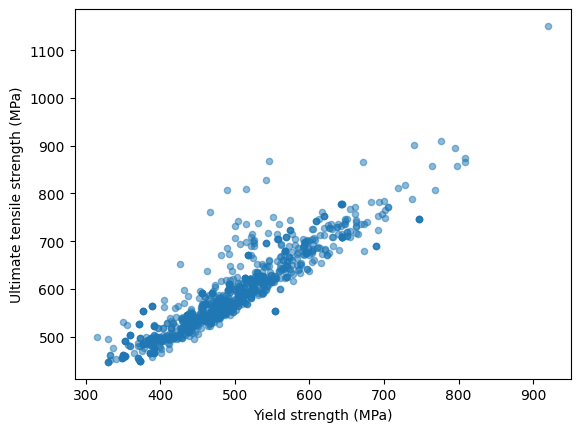

In [43]:
df_filled_missing_targets_NaN_with_less_cols_same_Unit.plot(kind="scatter", x="Yield strength (MPa)", y="Ultimate tensile strength (MPa)",
             alpha=0.5)


C:\Users\antho\AppData\Local\Temp\ipykernel_24592\341315508.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

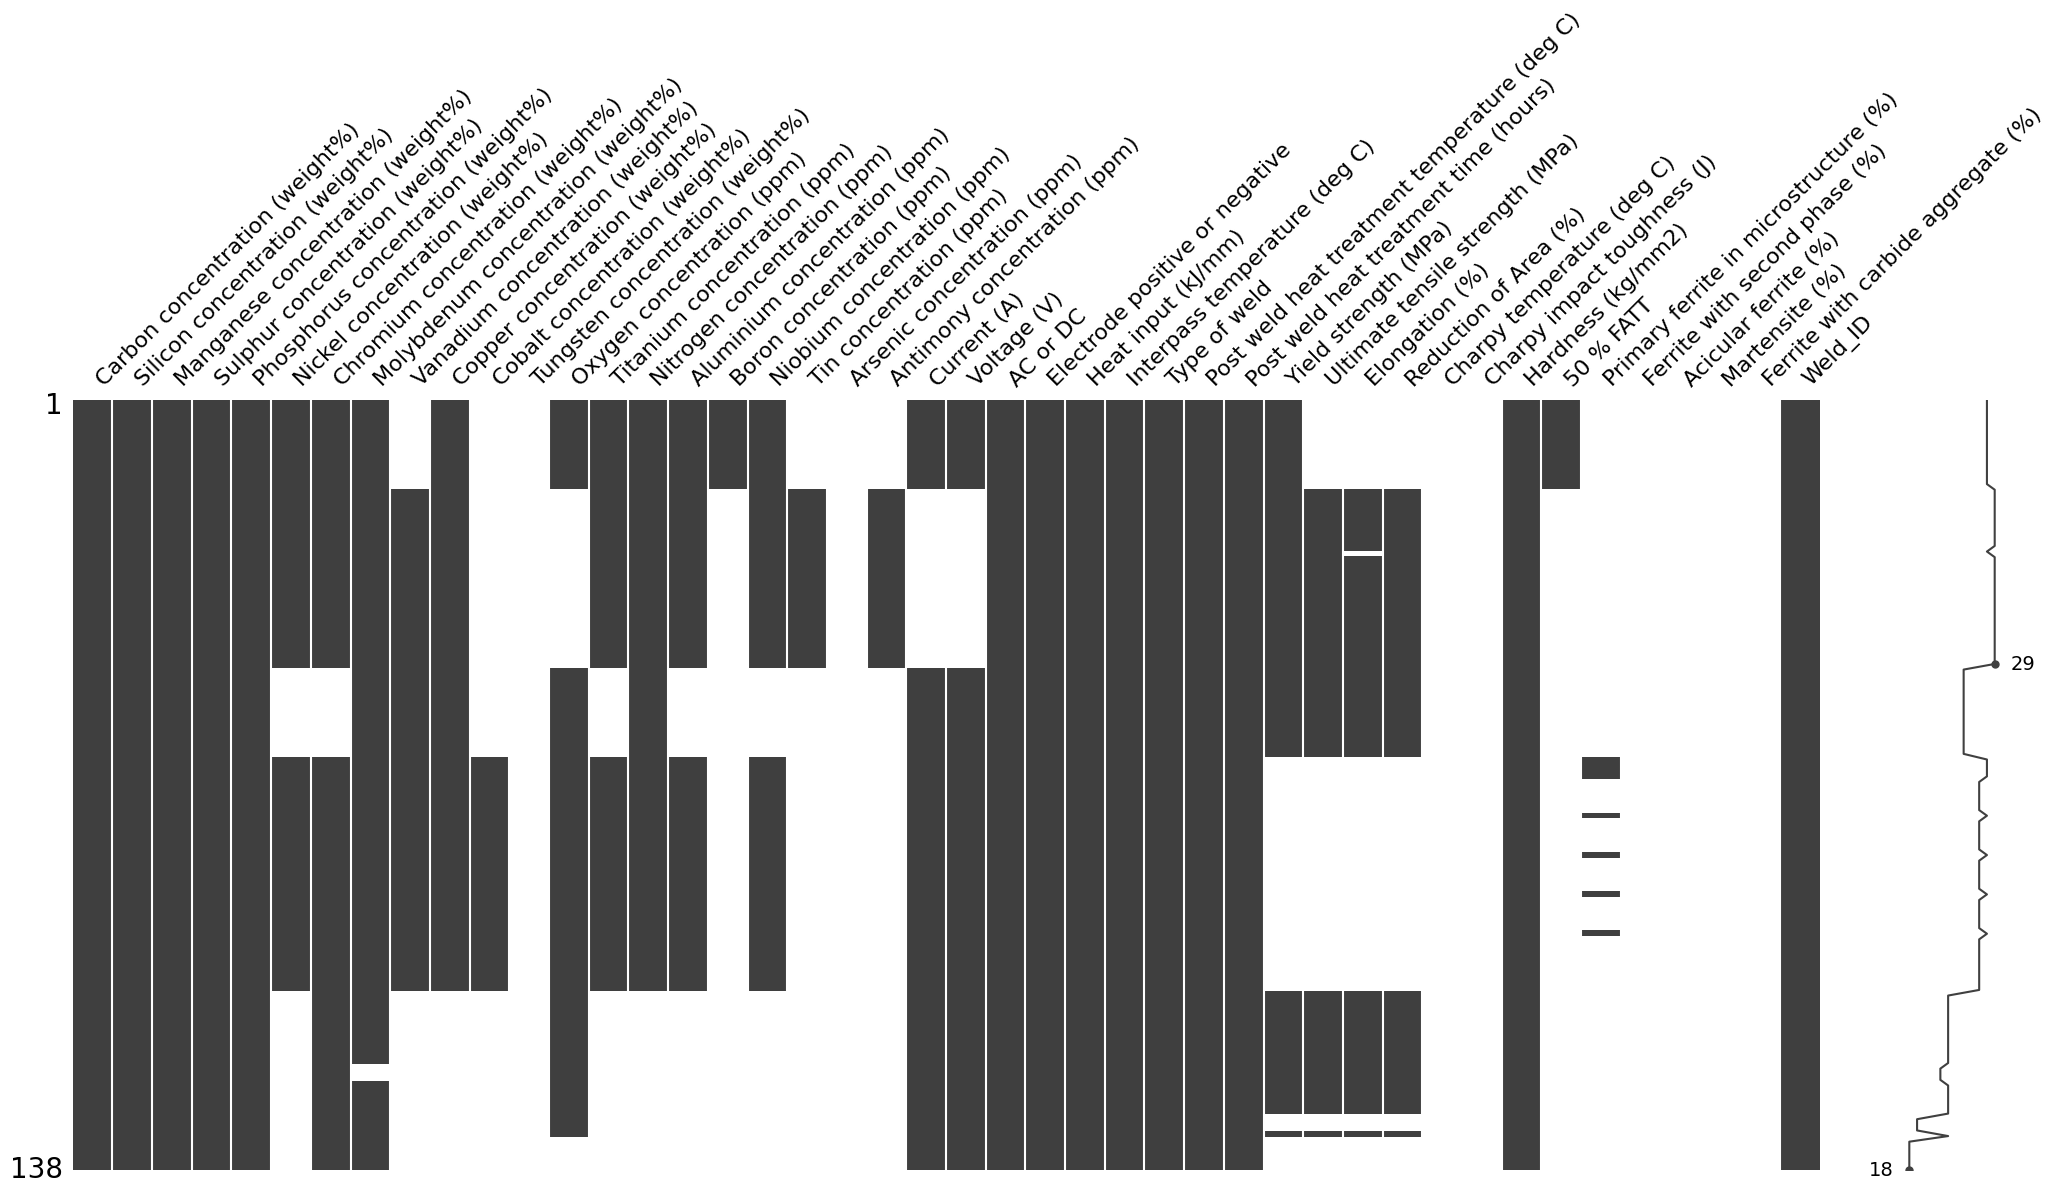

C:\Users\antho\AppData\Local\Temp\ipykernel_24592\341315508.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

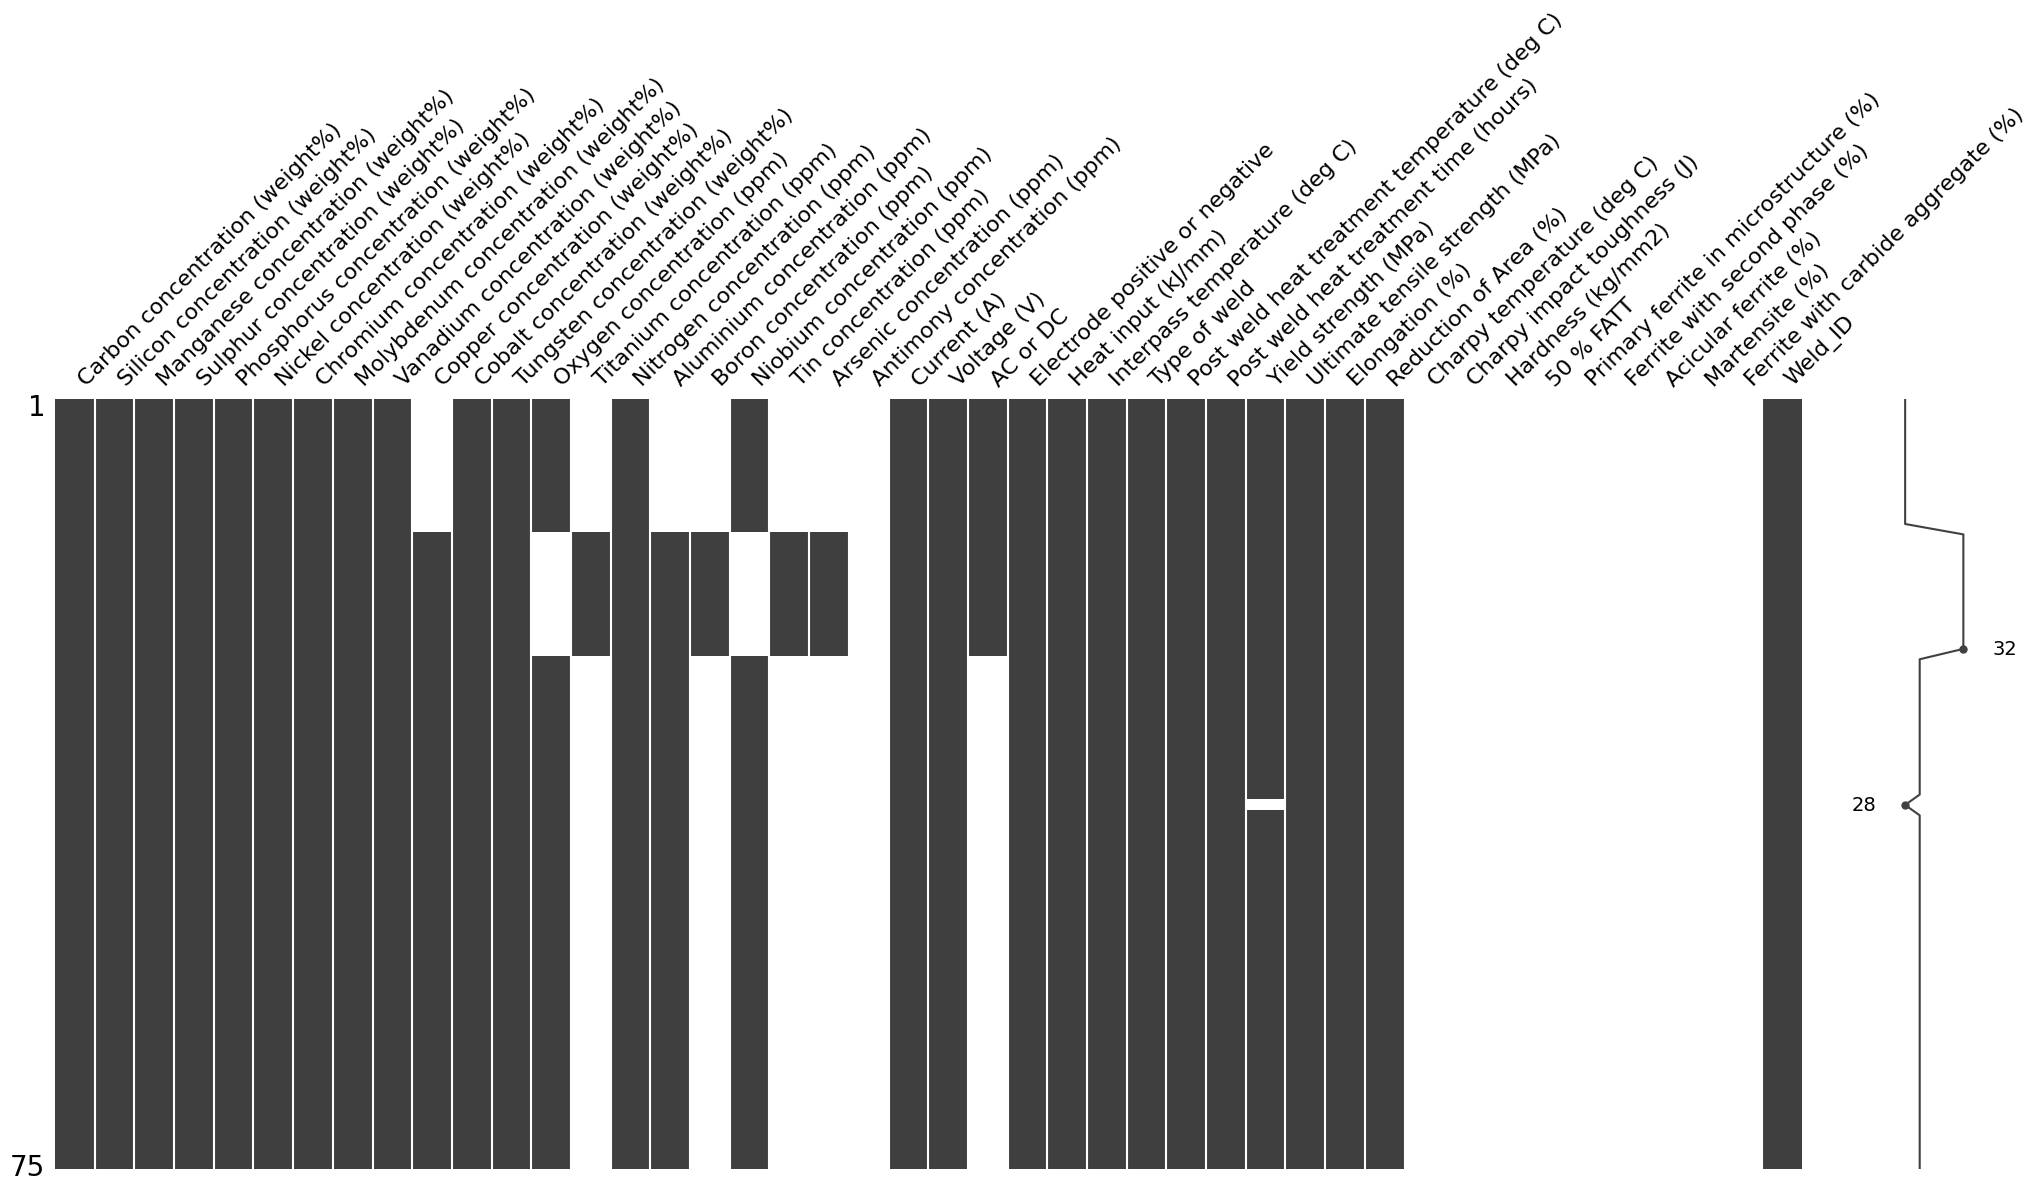

Carbon concentration (weight%)  Silicon concentration (weight%)  \
719                            0.099                             0.17   
720                            0.093                             0.16   
721                            0.101                             0.17   
722                            0.095                             0.16   
723                            0.096                             0.16   
...                              ...                              ...   
1482                           0.072                             1.08   
1483                           0.071                             0.84   
1484                           0.071                             0.84   
1485                           0.077                             0.64   
1486                           0.077                             0.64   

      Manganese concentration (weight%)  Sulphur concentration (weight%)  \
719                                1.01                            0.007   
720                                1.03                            0.008   
721                                1.02                            0.008   
722                                1.02                            0.007   
723                                1.01                            0.007   
...                                 ...                              ...   
1482                               1.71                            0.015   
1483                               1.53                            0.012   
1484                               1.53                            0.012   
1485                               1.43                            0.013   
1486                               1.43                            0.013   

      Phosphorus concentration (weight%)  Nickel concentration (weight%)  \
719                                0.012                            0.08   
720                                0.012                            0.98   
721                                0.012                            1.92   
722                                0.012                            3.01   
723                                0.013                            0.00   
...                                  ...                             ...   
1482                               0.028                            0.00   
1483                               0.022                            0.00   
1484                               0.022                            0.00   
1485                               0.017                            0.00   
1486                               0.017                            0.00   

      Chromium concentration (weight%)  Molybdenum concentration (weight%)  \
719                               9.30                                1.00   
720                               9.08                                0.98   
721                               9.12                                1.00   
722                               9.17                                0.96   
723                               9.16                                0.99   
...                                ...                                 ...   
1482                              0.00                                0.00   
1483                              0.00                                0.00   
1484                              0.00                                0.00   
1485                              0.00                                0.00   
1486                              0.00                                0.00   

      Vanadium concentration (weight%)  Copper concentration (weight%)  ...  \
719                               0.20                             NaN  ...   
720                               0.19                             NaN  ...   
721                               0.19                             NaN  ...   
722                               0.19            

In [44]:
import missingno as msno

def filter_and_display_missing_map(df, column_name):
    # Filtrer les lignes où la colonne spécifiée n'a pas de NaN
    df_filtered = df[df[column_name].notna()]
    
    # Afficher la carte des valeurs manquantes avec missingno
    plt.figure(figsize=(12,8))
    msno.matrix(df_filtered)
    plt.tight_layout()
    plt.show()

    return df_filtered

#filter_and_display_missing_map(df,"Acicular ferrite (%)")
#filter_and_display_missing_map(df,"Tin concentration (ppm)")
filter_and_display_missing_map(df,'Hardness (kg/mm2)')
filter_and_display_missing_map(df,"Tungsten concentration (weight%)")


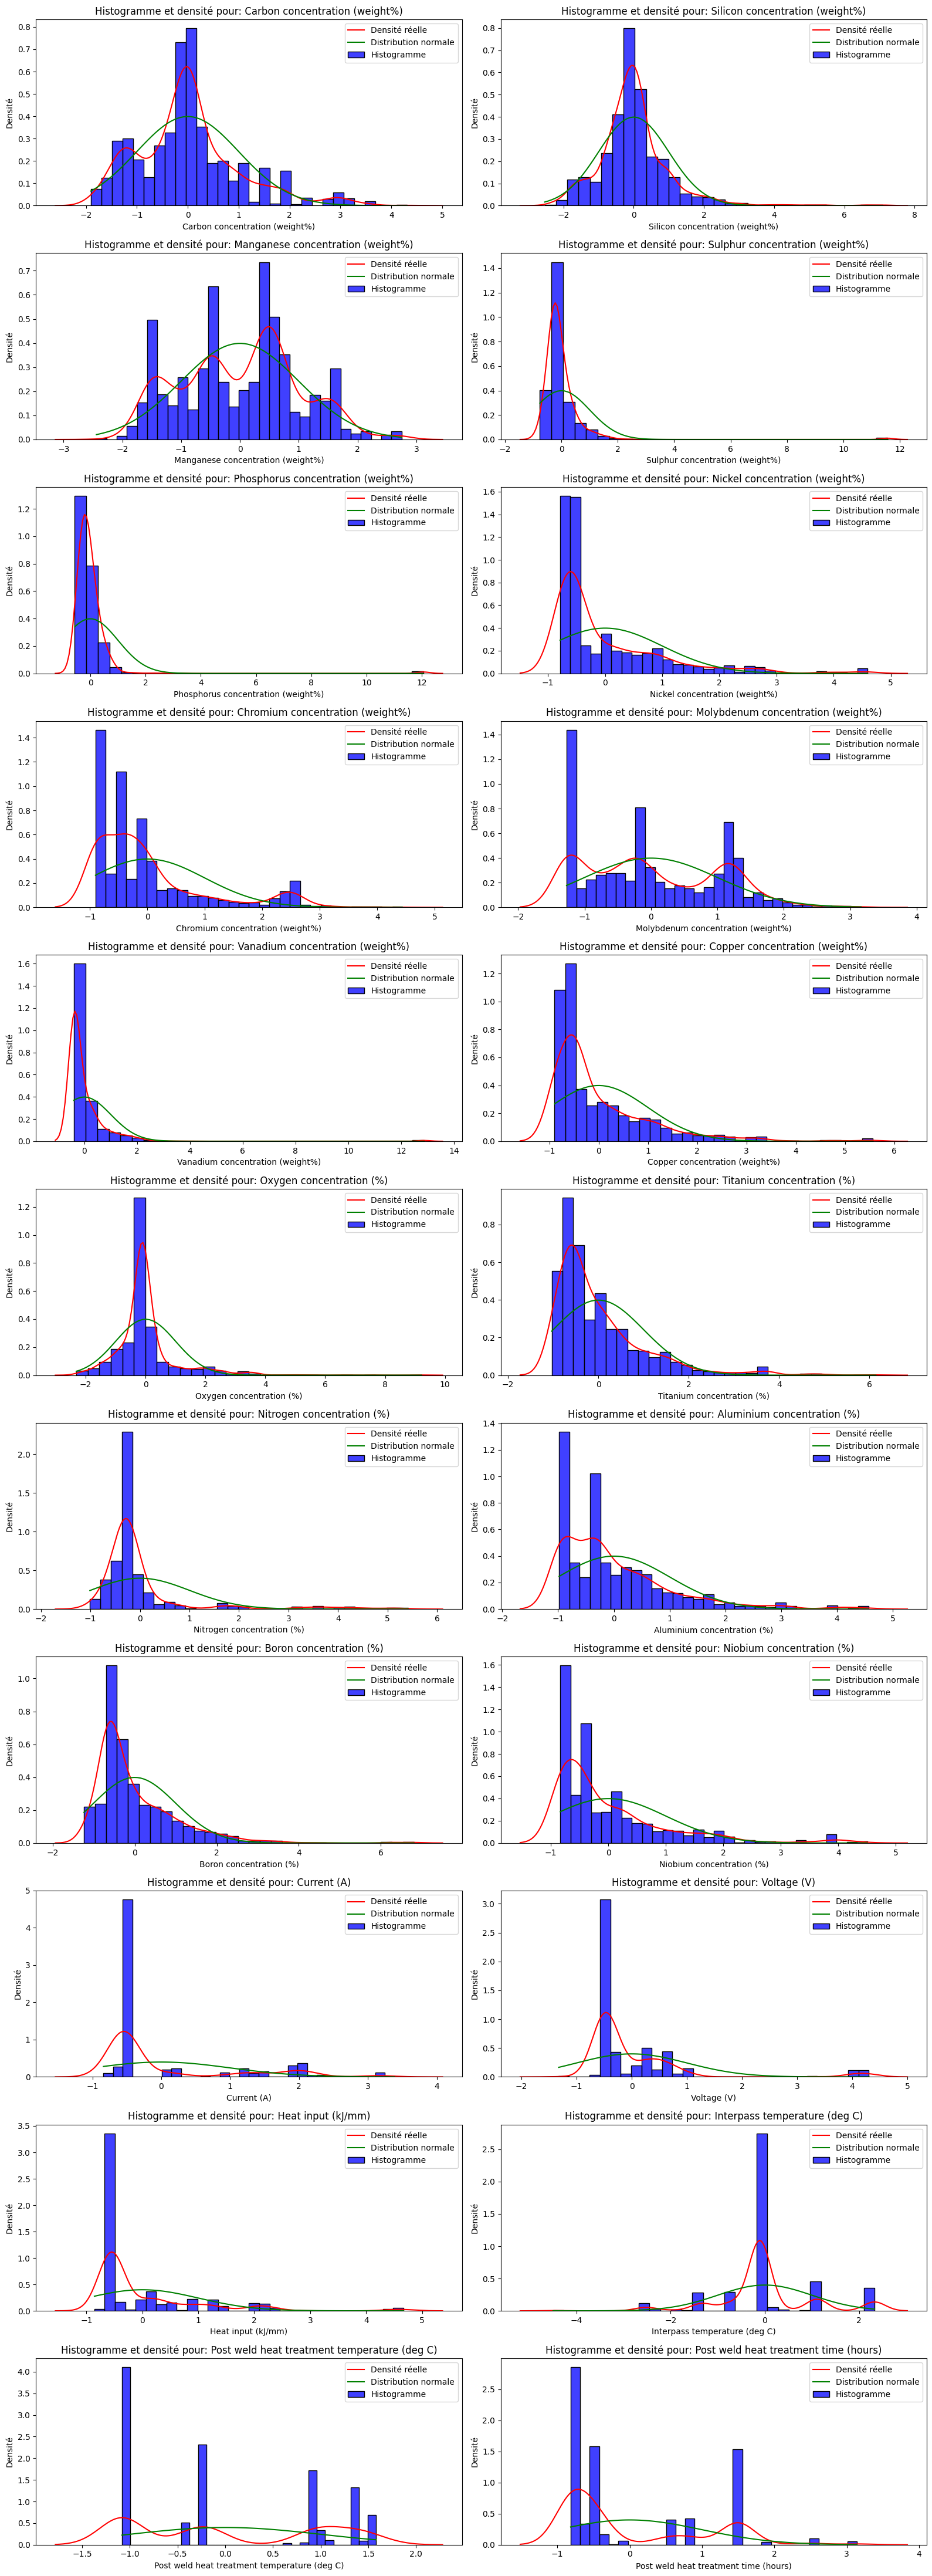

In [47]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def scale(X,scaler=MinMaxScaler()) :
    scaler = scaler
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return X_scaled

def plot_histograms_with_frequency(df):
    """
    Cette fonction parcourt chaque colonne numérique du DataFrame,
    et affiche les histogrammes avec courbes de densité dans une grille
    de sous-graphes avec 2 colonnes. L'axe des ordonnées affiche le nombre
    d'occurrences (la fréquence) plutôt que la densité.
    
    Paramètres:
    - df: pandas DataFrame contenant les données à analyser
    """
    # Sélectionner uniquement les colonnes numériques
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    num_columns = len(numeric_columns)

    # Calculer le nombre de lignes nécessaire pour les sous-graphes
    num_rows = (num_columns + 1) // 2  # 2 colonnes, donc (n/2) lignes

    # Créer une figure avec subplots de taille ajustée (2 colonnes)
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows))

    # Aplatir les axes pour un accès plus facile
    axes = axes.flatten()

    # Itérer sur chaque colonne numérique du DataFrame
    for i, column in enumerate(numeric_columns):
        data = df[column].dropna()  # Enlever les valeurs manquantes (NaN)
        
        # Afficher l'histogramme avec le nombre d'occurrences (fréquence)
        sns.histplot(data, kde=False, color='blue', bins=30, ax=axes[i], label='Histogramme')

        # Calculer la moyenne et l'écart-type pour la courbe de densité gaussienne
        mean = data.mean()
        std = data.std()

        # Tracer la courbe de densité réelle
        sns.kdeplot(data, color='red', ax=axes[i], label='Densité réelle')

        # Tracer la courbe de la distribution normale théorique
        x = np.linspace(data.min(), data.max(), 100)
        y = norm.pdf(x, mean, std) * len(data) * (data.max() - data.min()) / 30  # Ajuster pour la fréquence
        axes[i].plot(x, y, label='Distribution normale', color='green')

        # Ajouter des étiquettes et un titre
        axes[i].set_title(f'Histogramme et densité pour: {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Fréquence')  # L'axe des ordonnées est maintenant la fréquence
        axes[i].legend()

    # Supprimer les sous-graphes inutilisés si le nombre de colonnes est impair
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Ajuster l'espace entre les sous-graphes
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()

def plot_histograms_with_density(df):
    """
    Cette fonction parcourt chaque colonne numérique du DataFrame,
    et affiche les histogrammes avec courbes de densité dans une grille
    de sous-graphes avec 2 colonnes.
    
    Paramètres:
    - df: pandas DataFrame contenant les données à analyser
    """
    # Sélectionner uniquement les colonnes numériques
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    num_columns = len(numeric_columns)

    # Calculer le nombre de lignes nécessaire pour les sous-graphes
    num_rows = (num_columns + 1) // 2  # 2 colonnes, donc (n/2) lignes

    # Créer une figure avec subplots de taille ajustée (2 colonnes)
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 4 * num_rows))

    # Aplatir les axes pour un accès plus facile
    axes = axes.flatten()

    # Itérer sur chaque colonne numérique du DataFrame
    for i, column in enumerate(numeric_columns):
        data = df[column].dropna()  # Enlever les valeurs manquantes (NaN)
        
        # Afficher l'histogramme
        sns.histplot(data, kde=False, color='blue', stat='density', bins=30, ax=axes[i], label='Histogramme')

        # Calculer la moyenne et l'écart-type pour la courbe de densité gaussienne
        mean = data.mean()
        std = data.std()

        # Tracer la courbe de densité réelle
        sns.kdeplot(data, color='red', ax=axes[i], label='Densité réelle')

        # Tracer la courbe de la distribution normale théorique
        x = np.linspace(data.min(), data.max(), 100)
        y = norm.pdf(x, mean, std)
        axes[i].plot(x, y, label='Distribution normale', color='green')

        # Ajouter des étiquettes et un titre
        axes[i].set_title(f'Histogramme et densité pour: {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Densité')
        axes[i].legend()

    # Supprimer les sous-graphes inutilisés si le nombre de colonnes est impair
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Ajuster l'espace entre les sous-graphes
    plt.tight_layout()
    
    # Afficher le graphique
    plt.show()

X_std = data_regression[L_features]
X_std_num = X_std.drop(columns=['AC or DC', 'Electrode positive or negative', 'Type of weld'])
X_std_num= scale(X_std_num,scaler = StandardScaler())
plot_histograms_with_density(X_std_num)

## stochastic regression imputation

Carbon concentration (weight%)          0
Silicon concentration (weight%)         0
Manganese concentration (weight%)       0
Sulphur concentration (weight%)         4
Phosphorus concentration (weight%)     10
Nickel concentration (weight%)        955
Chromium concentration (weight%)      868
Molybdenum concentration (weight%)    859
Vanadium concentration (weight%)      724
dtype: int64
Carbon concentration (weight%)        0
Silicon concentration (weight%)       0
Manganese concentration (weight%)     0
Sulphur concentration (weight%)       0
Phosphorus concentration (weight%)    0
Nickel concentration (weight%)        0
Chromium concentration (weight%)      0
Molybdenum concentration (weight%)    0
Vanadium concentration (weight%)      0
dtype: int64
1652


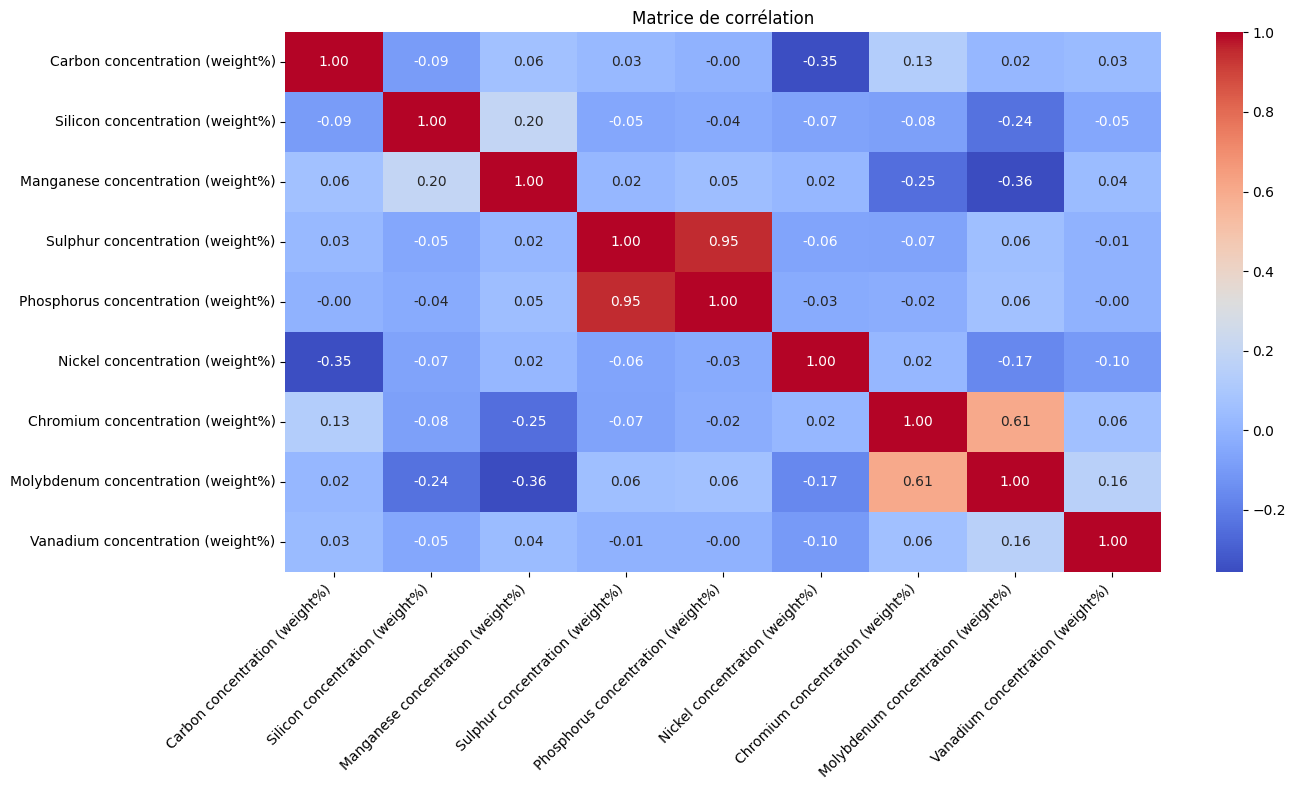

In [48]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
df_sti = df.iloc[:, :9]
print(df_sti.isnull().sum())

it_imp = IterativeImputer(sample_posterior=True)
X_it_imp = it_imp.fit_transform(df_sti)
df_it_imp = pd.DataFrame(X_it_imp, columns=df_sti.columns)

print(df_it_imp.isnull().sum())
print(df_it_imp.shape[0])
displayMatrixCorr(df_it_imp)

## Univariate

Carbon concentration (weight%)          0
Silicon concentration (weight%)         0
Manganese concentration (weight%)       0
Sulphur concentration (weight%)         4
Phosphorus concentration (weight%)     10
Nickel concentration (weight%)        955
Chromium concentration (weight%)      868
Molybdenum concentration (weight%)    859
Vanadium concentration (weight%)      724
dtype: int64
Carbon concentration (weight%)        0
Silicon concentration (weight%)       0
Manganese concentration (weight%)     0
Sulphur concentration (weight%)       0
Phosphorus concentration (weight%)    0
Nickel concentration (weight%)        0
Chromium concentration (weight%)      0
Molybdenum concentration (weight%)    0
Vanadium concentration (weight%)      0
dtype: int64
1652


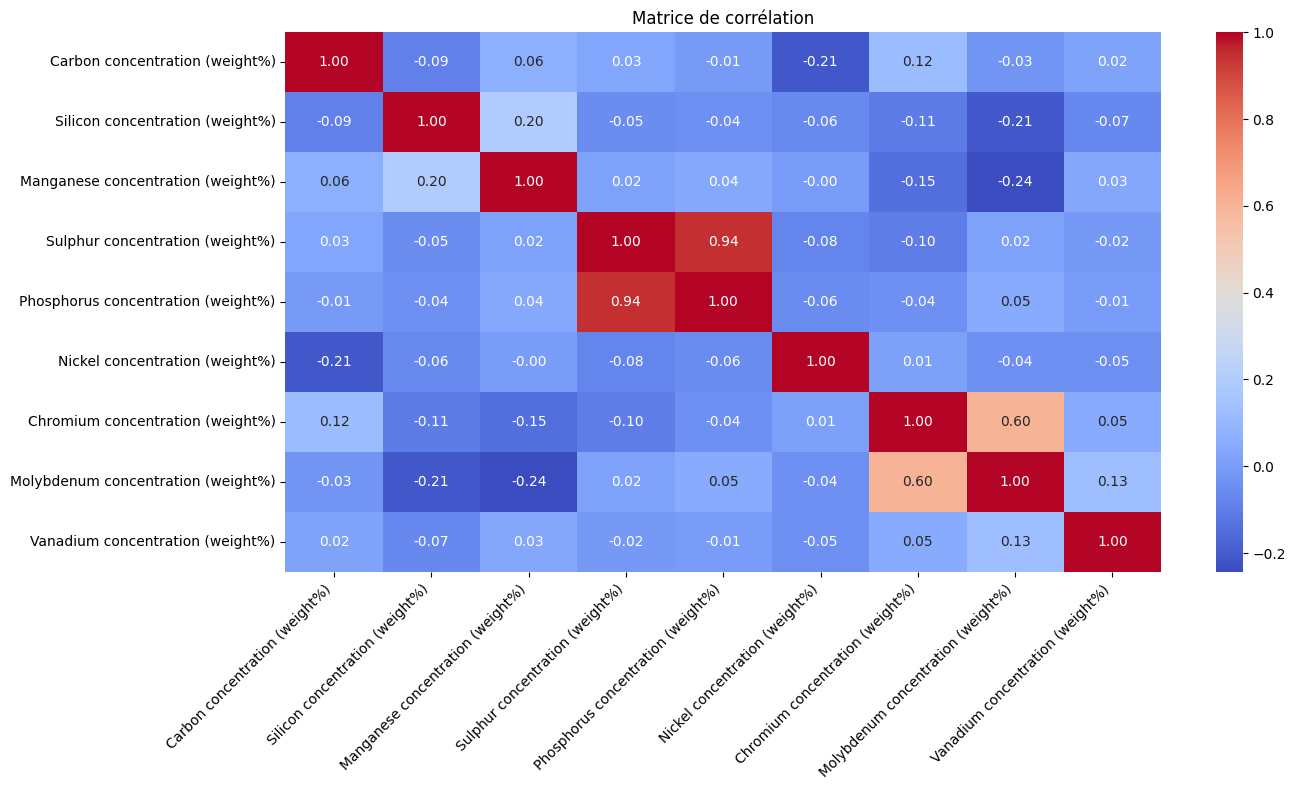

In [49]:
from sklearn.impute import SimpleImputer
df_sti = df.iloc[:, :9]
print(df_sti.isnull().sum())
# Instantiate a transformer for mean imputation.
imp_mean = SimpleImputer(strategy='mean')

# Transforms X so that the missing values are determined by mean imputation.
# The "fit" part is used to compute the mean of the values in X[:, 1]
X_mean = imp_mean.fit_transform(df_sti)

df_it_imp = pd.DataFrame(X_mean , columns=df_sti.columns)

print(df_it_imp.isnull().sum())
print(df_it_imp.shape[0])
displayMatrixCorr(df_it_imp)

In [50]:
def display_boxplots_two_dfs(df1, df2):
    # Vérifier que les deux DataFrames ont les mêmes colonnes
    if set(df1.columns) != set(df2.columns):
        raise ValueError("Les DataFrames doivent avoir les mêmes colonnes.")
    
    # Compteur pour savoir combien de boxplots ont été affichés
    plot_count = 0
    num_columns = len(df1.columns)
    
    # Création d'une figure avec 2 sous-graphes par ligne (2 colonnes)
    fig, axes = plt.subplots(nrows=(num_columns + 1), ncols=2, figsize=(6, (num_columns + 1) // 2 * 5))
    
    # Aplatir les axes (au cas où il y ait plusieurs lignes de sous-graphiques)
    axes = axes.flatten()
    
    # Parcourir chaque colonne des DataFrames
    for i, col in enumerate(df1.columns):
        # Retirer les valeurs NaN de la colonne du premier DataFrame
        non_nan_values_df1 = df1[col].dropna()
        
        # Retirer les valeurs NaN de la colonne du deuxième DataFrame
        non_nan_values_df2 = df2[col].dropna()
        
        # Créer un boxplot pour la colonne du premier DataFrame dans l'axe correspondant
        axes[plot_count].boxplot(non_nan_values_df1)
        axes[plot_count].set_title(f"Boxplot de {col} (df1)", fontsize=8)
        axes[plot_count].set_xlabel(col)
        
        # Créer un boxplot pour la colonne du deuxième DataFrame dans l'axe suivant
        axes[plot_count + 1].boxplot(non_nan_values_df2)
        axes[plot_count + 1].set_title(f"Boxplot de {col} (df2)", fontsize=8)
        axes[plot_count + 1].set_xlabel(col)
        
        # Incrémenter le compteur de boxplots de 2
        plot_count += 2
        
        # Vérifier si on a dépassé le nombre de colonnes et sortir de la boucle
        if plot_count >= len(axes):
            break
    
    # Supprimer les sous-graphiques inutilisés (s'il y en a)
    for i in range(plot_count, len(axes)):
        if i < len(axes):  # Vérifier que l'index est dans les limites
            fig.delaxes(axes[i])
    
    # Ajuster l'espacement entre les sous-graphiques
    plt.tight_layout()
    plt.show()

## Création d'un dataframe pour le PCA ou clustering